<a href="https://colab.research.google.com/github/Mohammad-Kaosain-Akbar/Update-25th-May-22/blob/main/XGB/XGB%20with%20many%20inputs/Applying_XGBoost_on_Grenoble_Dataset_from_17_to_19_(many_inputs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (25,10)
mpl.rcParams['axes.grid'] = False

In [315]:
df = pd.read_csv('https://raw.githubusercontent.com/Mohammad-Kaosain-Akbar/NILM-two-years-dataset/main/Data_Greener_all.csv')
df['Time']= pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               43824 non-null  datetime64[ns]
 1   Ventilation        43824 non-null  float64       
 2   Sokets plug        43824 non-null  float64       
 3   Lighting           43824 non-null  float64       
 4   Other electricity  43824 non-null  float64       
 5   Cooling            43824 non-null  float64       
 6   Heating            43824 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.3 MB


In [316]:
Total = df["Ventilation"] + df["Sokets plug"] + df["Lighting"] + df["Other electricity"] + df["Cooling"] + df["Heating"]
# https://www.kite.com/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python

df["Total"] = Total

In [317]:
df

Time  Ventilation  Sokets plug  Lighting  \
0     2017-01-03 13:00:00         27.4         41.8      53.7   
1     2017-01-03 14:00:00         21.6         37.5      50.9   
2     2017-01-03 15:00:00         18.5         37.4      60.1   
3     2017-01-03 16:00:00         29.7         38.0      52.6   
4     2017-01-03 17:00:00         16.7         38.1      56.7   
...                   ...          ...          ...       ...   
43819 2022-01-03 08:00:00         59.3         17.9      16.6   
43820 2022-01-03 09:00:00         71.9         20.6      33.1   
43821 2022-01-03 10:00:00         90.5         30.9      47.8   
43822 2022-01-03 11:00:00         94.0         33.9      52.2   
43823 2022-01-03 12:00:00         95.3         28.5      36.3   

       Other electricity  Cooling  Heating   Total  
0                   89.6    18.60    498.0  729.10  
1                   64.6    61.90    500.0  736.50  
2                   64.2    16.50    480.0  676.70  
3                   43.2    19.80    390.0  573.30  
4                   42.4    15.20    373.0  542.10  
...                  ...      ...      ...     ...  
43819              115.0    12.70    344.0  565.50  
43820              149.0    11.90    399.0  685.50  
43821              157.0    12.90    397.0  736.10  
43822              155.0    15.40    345.0  695.50  
43823              107.0     7.88    272.0  546.98  

[43824 rows x 8 columns]

In [318]:
df.describe()

Ventilation   Sokets plug      Lighting  Other electricity  \
count  43824.000000  43824.000000  43824.000000       43824.000000   
mean      32.433825     18.414002     14.316892          87.846242   
std       36.211287     27.666459     15.064466          94.951663   
min        0.000000      0.000000      0.000000           0.000000   
25%        7.000000     11.400000      3.690000          35.800000   
50%       14.100000     13.600000      6.500000          79.600000   
75%       56.800000     20.100000     22.500000         103.000000   
max      793.000000    980.000000    132.000000         971.000000   

            Cooling       Heating         Total  
count  43824.000000  43824.000000  43824.000000  
mean      47.084925     68.994602    269.090489  
std       71.422794    113.328362    180.713964  
min        0.000000      0.000000      3.130000  
25%       13.600000      5.500000    151.377500  
50%       21.500000     12.300000    208.180000  
75%       51.600000     89.000000    336.000000  
max     1641.000000   1120.000000   2037.000000

In [319]:
df['Year'] = df['Time'].dt.year
df['Month']=df['Time'].dt.month
df['Quarter_of_year']=df['Time'].dt.quarter
df['Day_of_week']=df['Time'].dt.day_of_week
df['Week_of_year']=df['Time'].dt.week
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour

df.drop('Time', inplace=True, axis=1)

In [320]:
df

Ventilation  Sokets plug  Lighting  Other electricity  Cooling  \
0             27.4         41.8      53.7               89.6    18.60   
1             21.6         37.5      50.9               64.6    61.90   
2             18.5         37.4      60.1               64.2    16.50   
3             29.7         38.0      52.6               43.2    19.80   
4             16.7         38.1      56.7               42.4    15.20   
...            ...          ...       ...                ...      ...   
43819         59.3         17.9      16.6              115.0    12.70   
43820         71.9         20.6      33.1              149.0    11.90   
43821         90.5         30.9      47.8              157.0    12.90   
43822         94.0         33.9      52.2              155.0    15.40   
43823         95.3         28.5      36.3              107.0     7.88   

       Heating   Total  Year  Month  Quarter_of_year  Day_of_week  \
0        498.0  729.10  2017      1                1            1   
1        500.0  736.50  2017      1                1            1   
2        480.0  676.70  2017      1                1            1   
3        390.0  573.30  2017      1                1            1   
4        373.0  542.10  2017      1                1            1   
...        ...     ...   ...    ...              ...          ...   
43819    344.0  565.50  2022      1                1            0   
43820    399.0  685.50  2022      1                1            0   
43821    397.0  736.10  2022      1                1            0   
43822    345.0  695.50  2022      1                1            0   
43823    272.0  546.98  2022      1                1            0   

       Week_of_year  Day  Hour  
0                 1    3    13  
1                 1    3    14  
2                 1    3    15  
3                 1    3    16  
4                 1    3    17  
...             ...  ...   ...  
43819             1    3     8  
43820             1    3     9  
43821             1    3    10  
43822             1    3    11  
43823             1    3    12  

[43824 rows x 14 columns]

In [321]:
df1_train = df.loc[(df['Year'].isin([2017,2018]))]
 
##################################################################
 
df1_test = df.loc[(df['Year'].isin([2019]))]  # general model
 
df2_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([6,7,8,9]))]  # summer
 
df3_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([12,1,2,3]))]  # winter
 
df4_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([1,2,3,4,5,6,7,8]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # early morning 1am to 8 am
 
df5_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([9,10,11,12,13,14,15,16,17,18,19]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # working hours 9am to 7pm
 
df6_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([20,21,22,23,0]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  #night hours 8 pm to 12 am
 
df7_test = df.loc[(df['Year'].isin([2019]))&(df['Day_of_week'].isin([5,6]))]  # weekend
 
 
print('df_train.shape: ', df1_train.shape)
print('df_test.shape: ', df1_test.shape)
 


df_train.shape:  (17459, 14)
df_test.shape:  (8760, 14)


In [322]:
X_train1 = df1_train[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_train1 = df1_train[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
X_test1 = df1_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df1_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

(17459, 8) (17459, 6) (8760, 8) (8760, 6)


In [323]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1=sc.fit_transform(X_test1)

In [324]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
model = MultiOutputRegressor(XGBRegressor())
model.fit(X_train1, y_train1)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
     

In [325]:
pred = model.predict(X_test1)


**GENERAL**

In [326]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

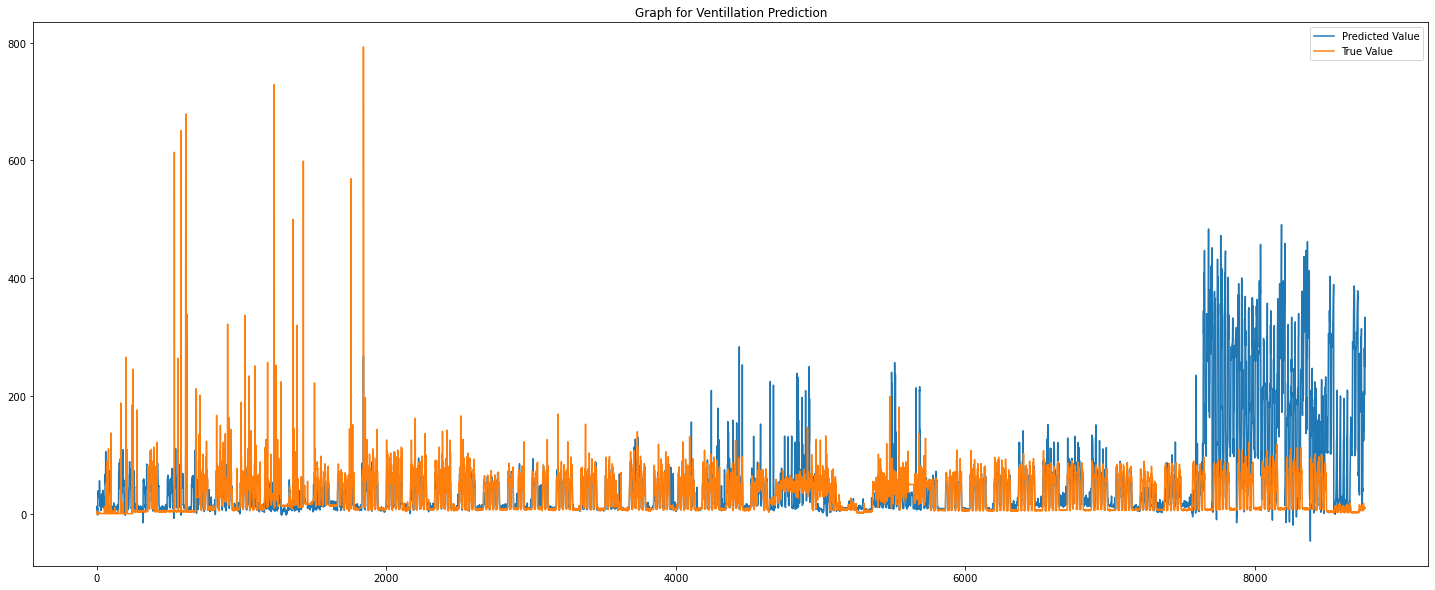

In [327]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [328]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  33.11262583293017

Root Mean Sqaured Error is:  75.73779665950535

R2 score is:  -3.20360165182743


In [329]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

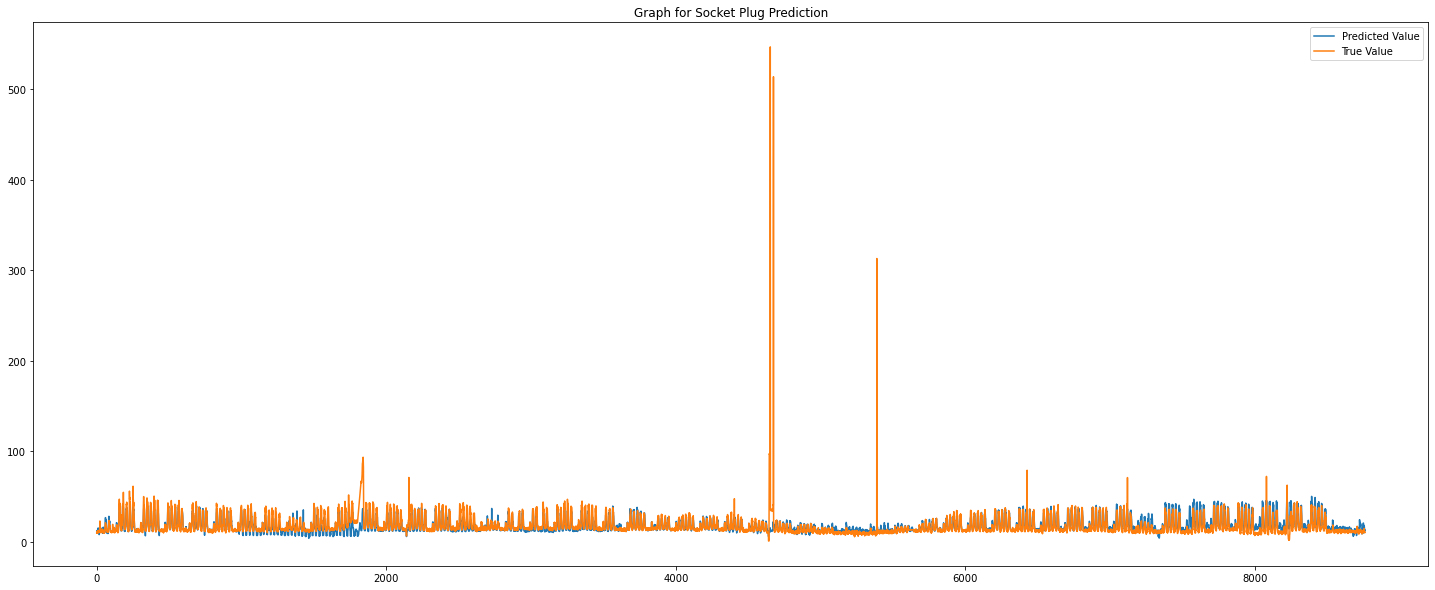

In [330]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [331]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  3.563431702927149

Root Mean Sqaured Error is:  10.794719229420764

R2 score is:  0.30270116522069435


In [332]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

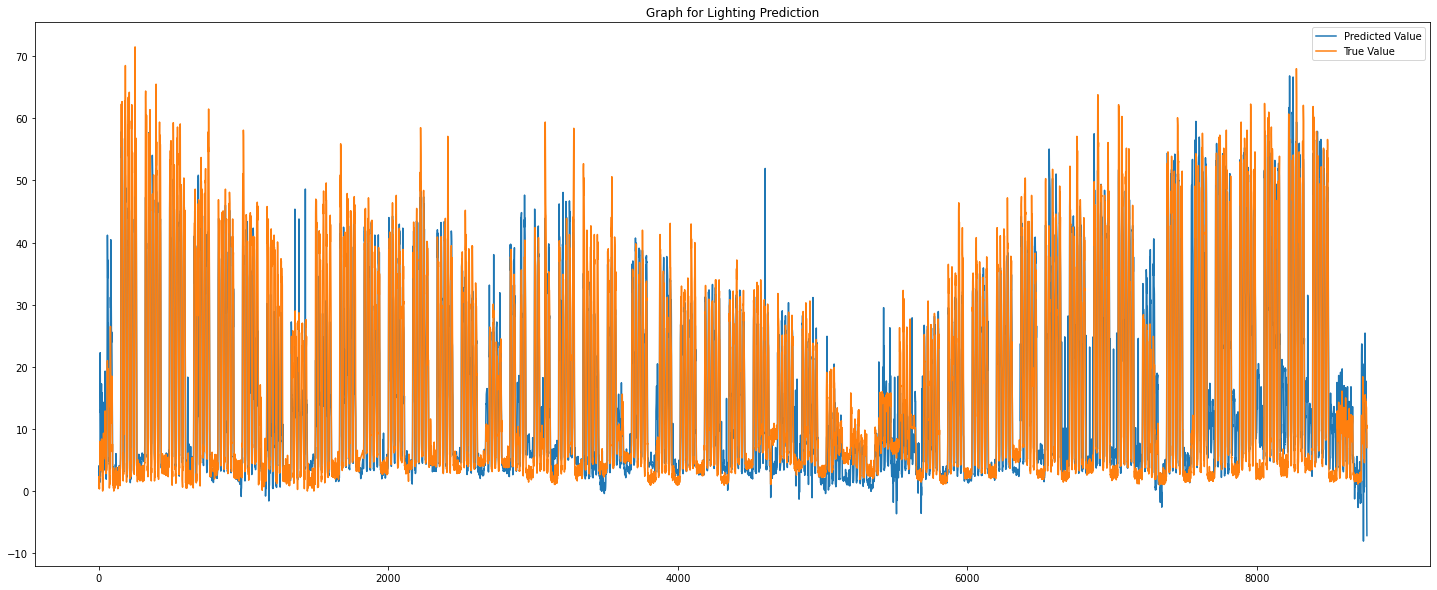

In [333]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [334]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  3.9061332019012385

Root Mean Sqaured Error is:  6.041407265830159

R2 score is:  0.8543795663648308


In [335]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

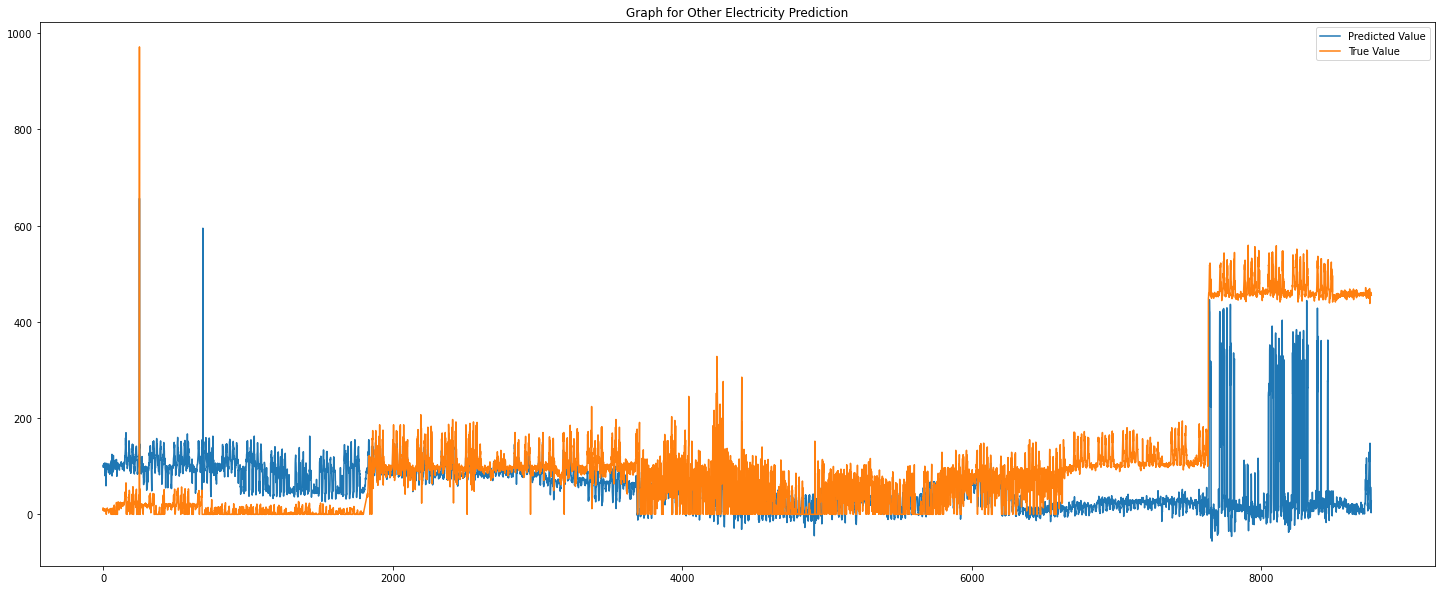

In [336]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [337]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  96.82965053485701

Root Mean Sqaured Error is:  161.91047101863361

R2 score is:  -0.2585027075019708


In [338]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

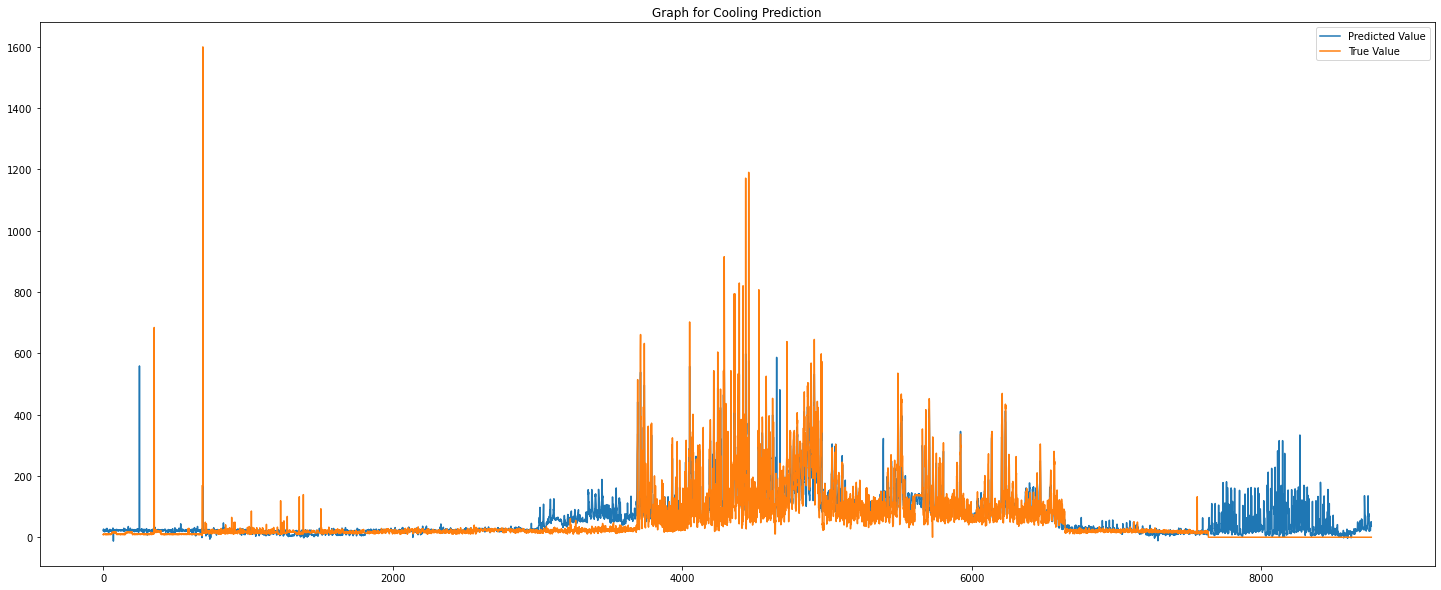

In [339]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [340]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  23.653413431925316

Root Mean Sqaured Error is:  41.44042071244224

R2 score is:  0.7656241517209507


In [341]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

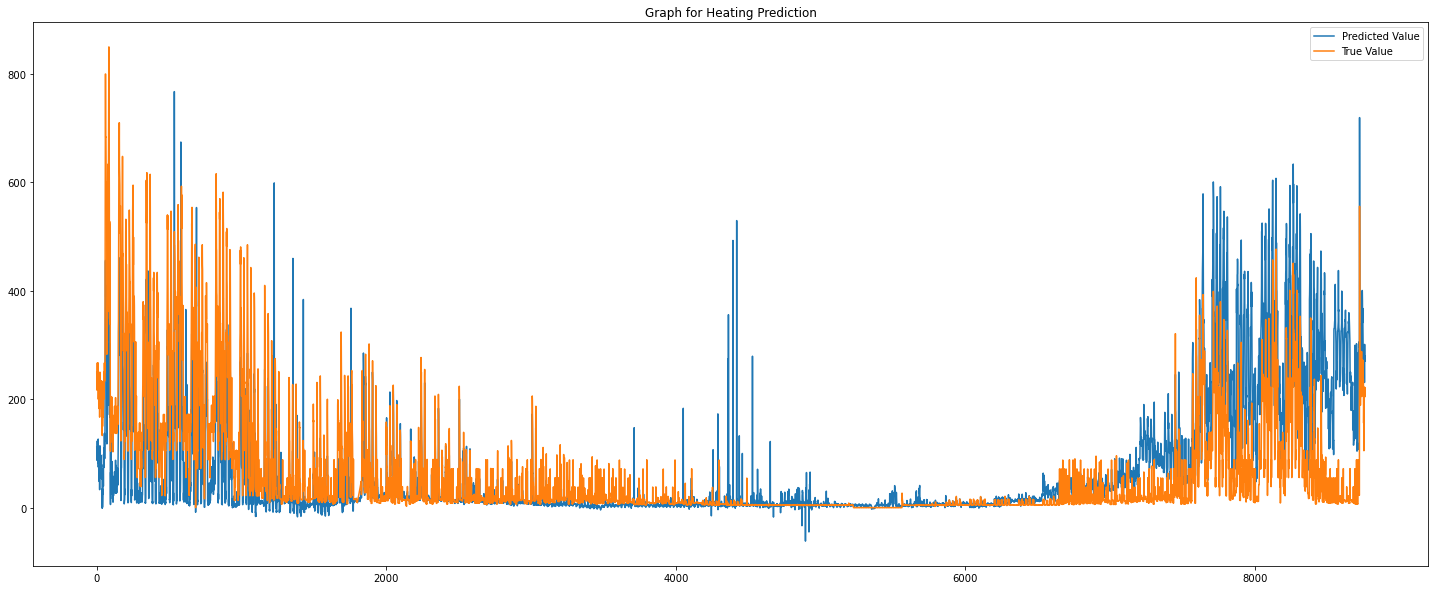

In [342]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [343]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  52.360878157211076

Root Mean Sqaured Error is:  92.83502181925041

R2 score is:  0.23386573554386492


**SUMMER**

In [344]:
X_test1 = df2_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df2_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2928, 8) (2928, 6)


In [345]:
X_test1=sc.fit_transform(X_test1)

In [346]:
pred = model.predict(X_test1)

In [347]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

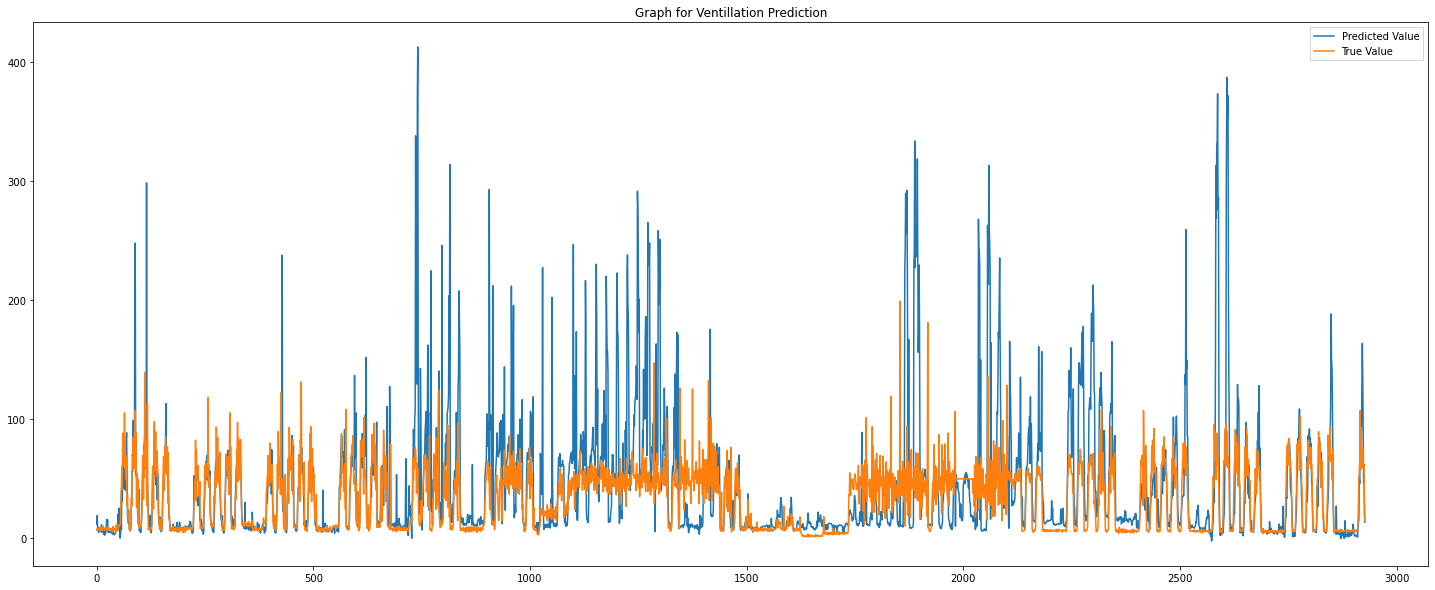

In [348]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [349]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  23.34937957257114

Root Mean Sqaured Error is:  46.21491472889302

R2 score is:  -2.150823476782813


In [350]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

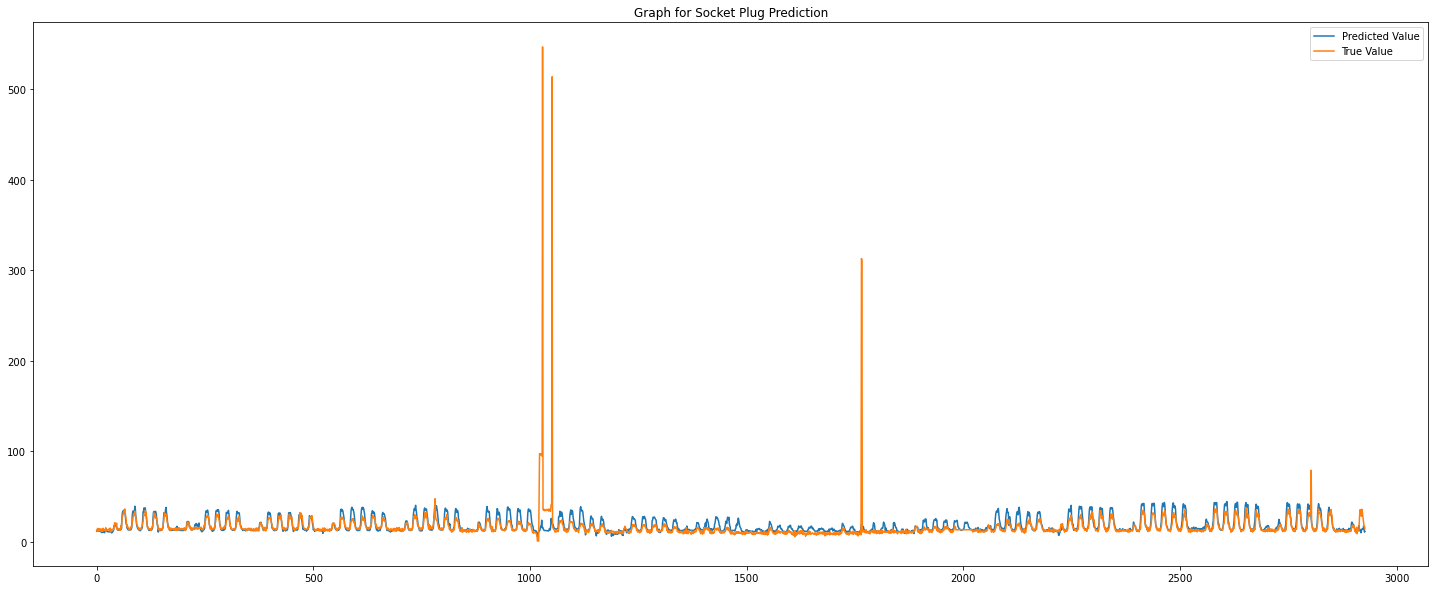

In [351]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [352]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.4794000873956525

Root Mean Sqaured Error is:  16.805431560171662

R2 score is:  0.05016501545003227


In [353]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

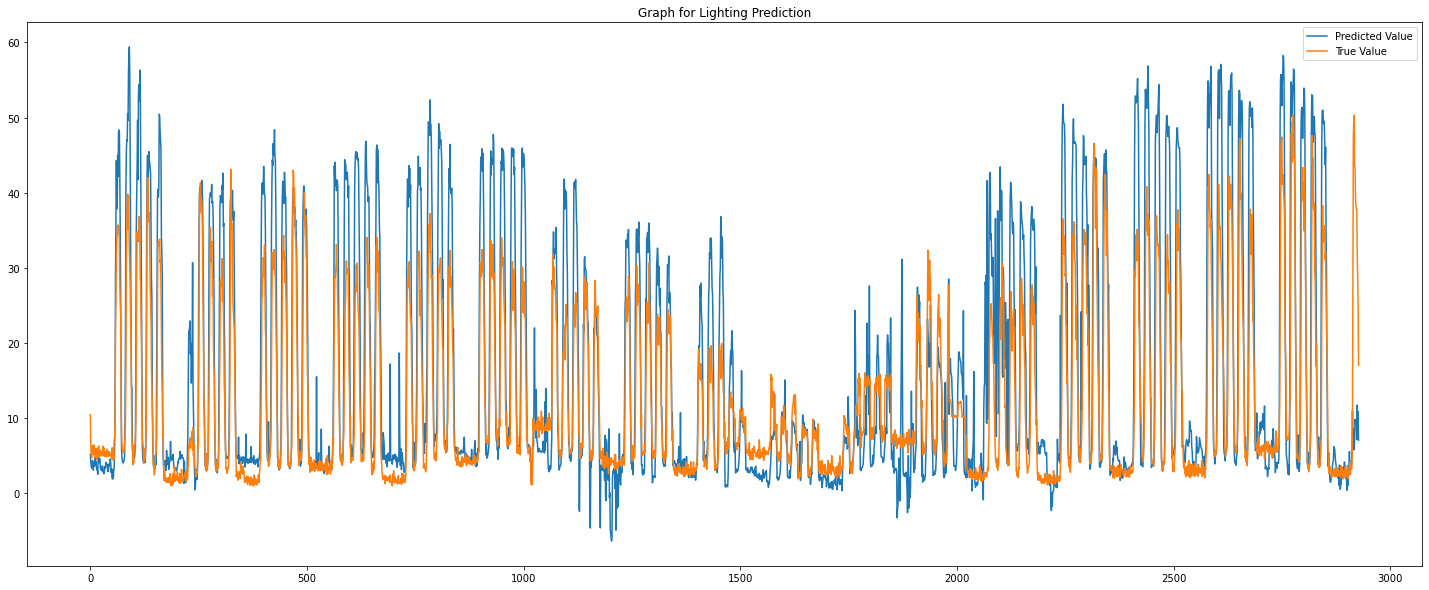

In [354]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [355]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.68768855551968

Root Mean Sqaured Error is:  8.444618844418114

R2 score is:  0.4213514086666261


In [356]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

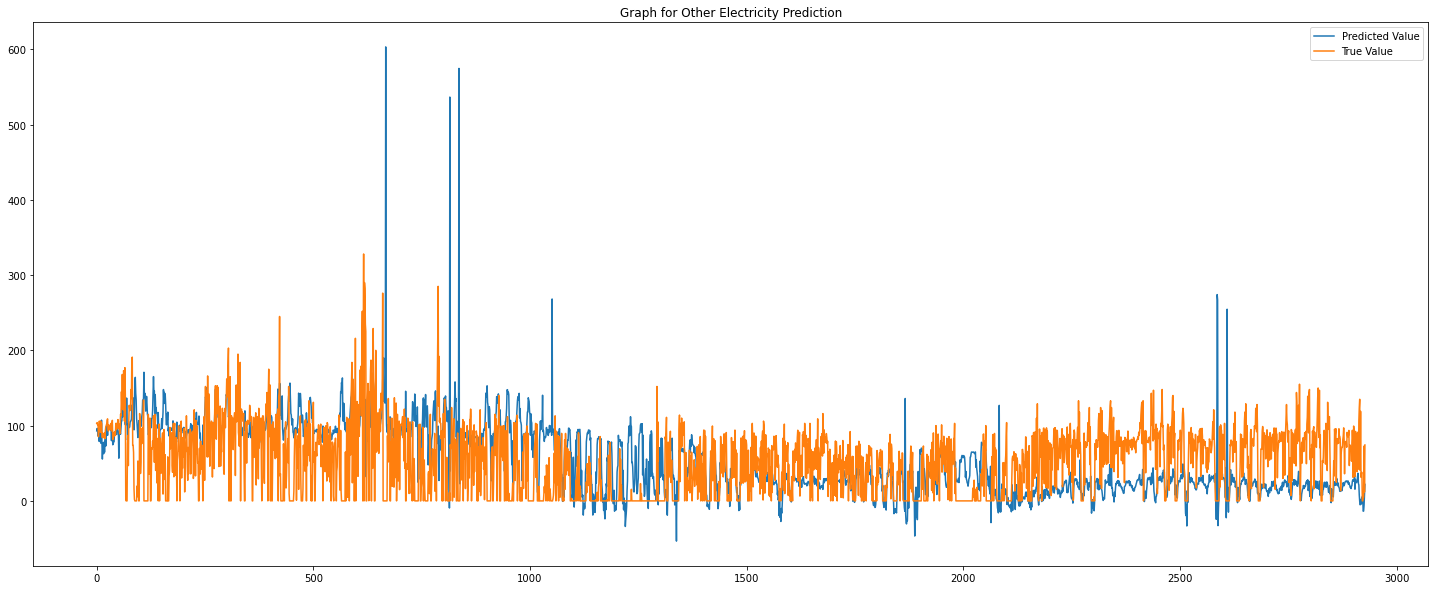

In [357]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [358]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  44.10268506138119

Root Mean Sqaured Error is:  58.662717633629136

R2 score is:  -0.7158944765706952


In [359]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

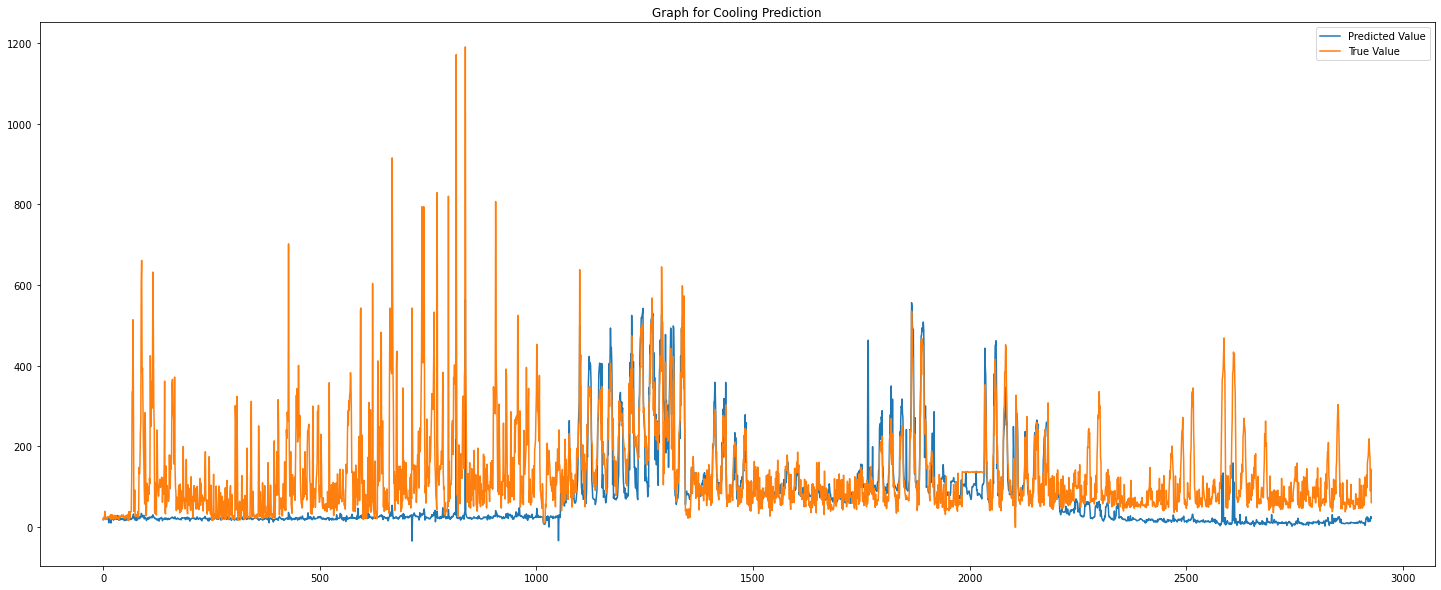

In [360]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [361]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  71.81316597610711

Root Mean Sqaured Error is:  113.9407559346445

R2 score is:  -0.07632578653326894


In [362]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

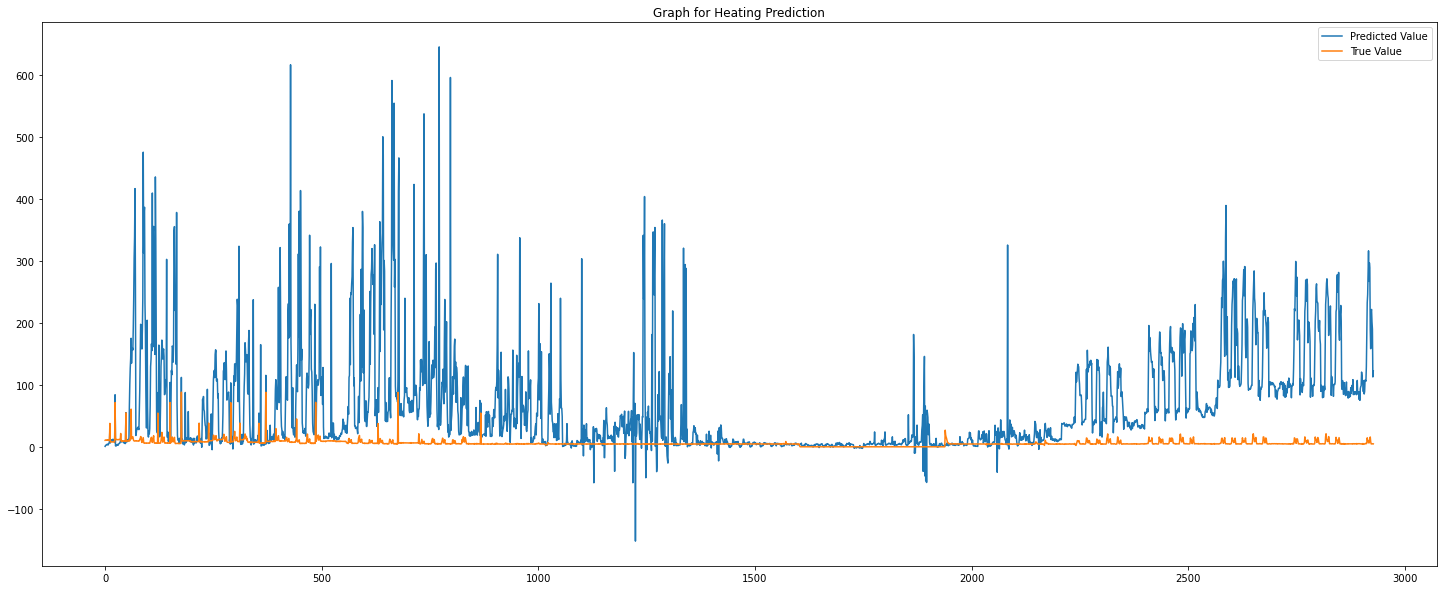

In [363]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [364]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  60.93288413479268

Root Mean Sqaured Error is:  101.86578472794773

R2 score is:  -330.4150337946264


**WINTER**

In [365]:
X_test1 = df3_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df3_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2903, 8) (2903, 6)


In [366]:
X_test1=sc.fit_transform(X_test1)

In [367]:
pred = model.predict(X_test1)

In [368]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

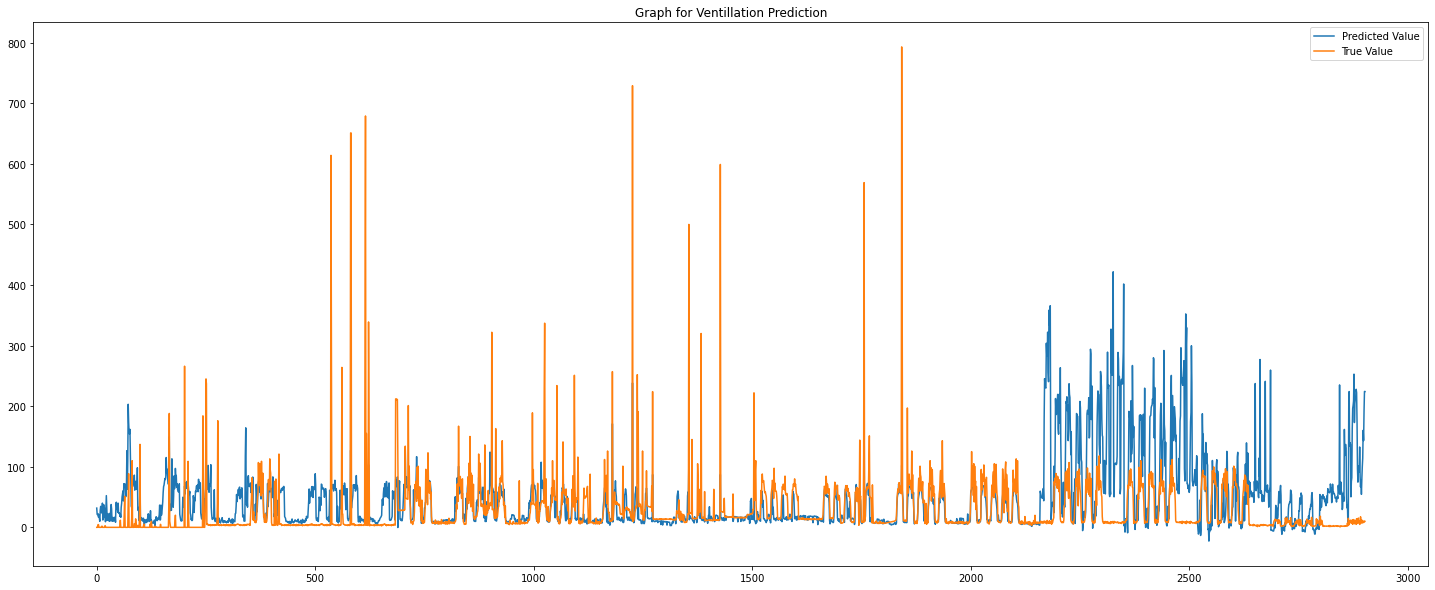

In [369]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [370]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  36.62133135358181

Root Mean Sqaured Error is:  69.34553786749935

R2 score is:  -0.8844413033541894


In [371]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

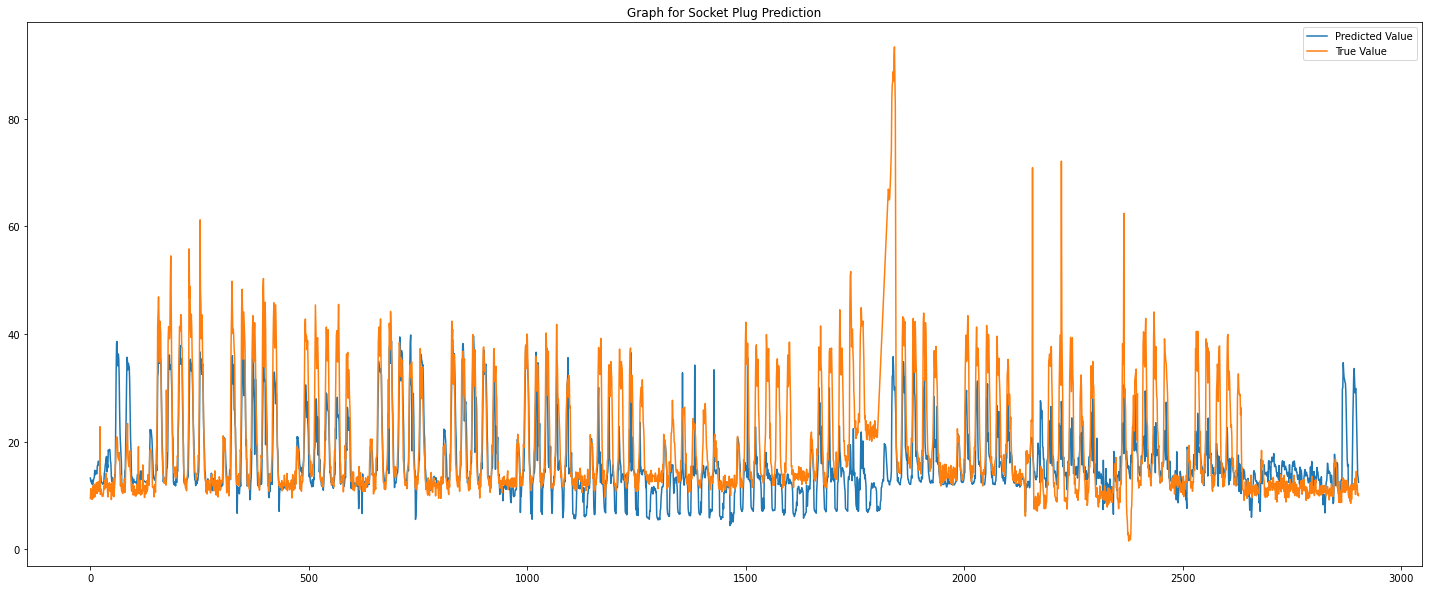

In [372]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [373]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.799639227877311

Root Mean Sqaured Error is:  9.287243455775764

R2 score is:  0.28908451070352137


In [374]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

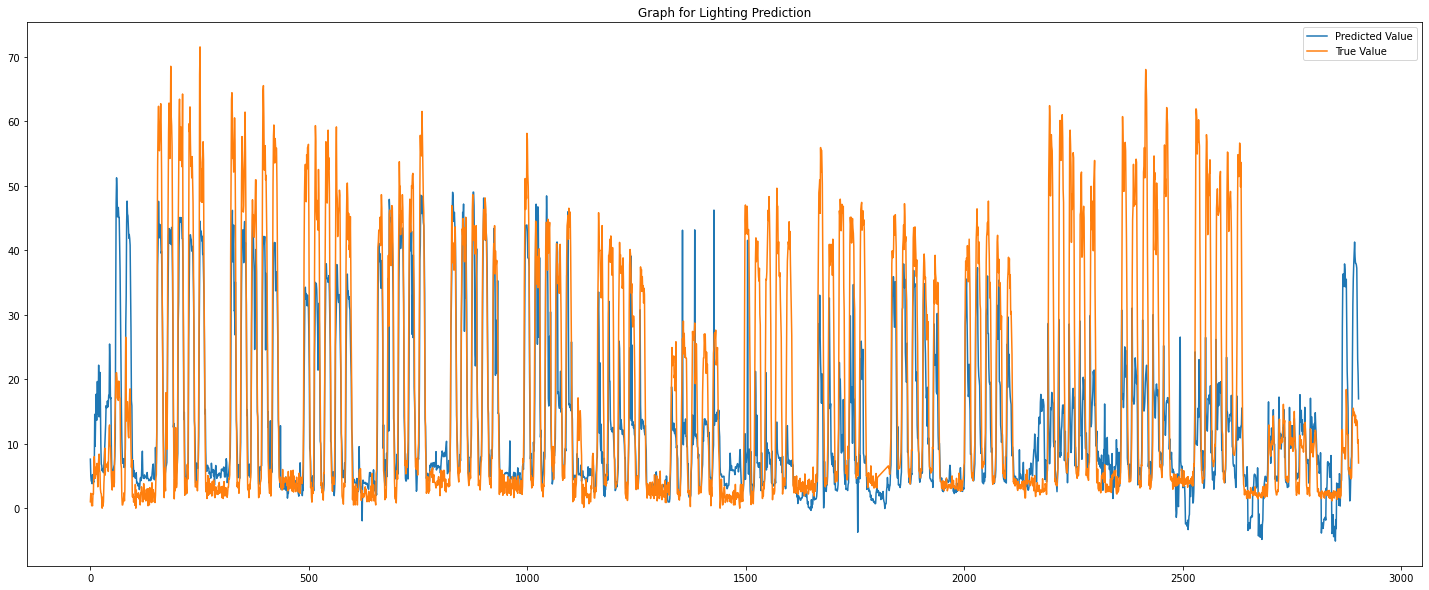

In [375]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [376]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  8.345665801252029

Root Mean Sqaured Error is:  13.200380225853673

R2 score is:  0.48097413824431245


In [377]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

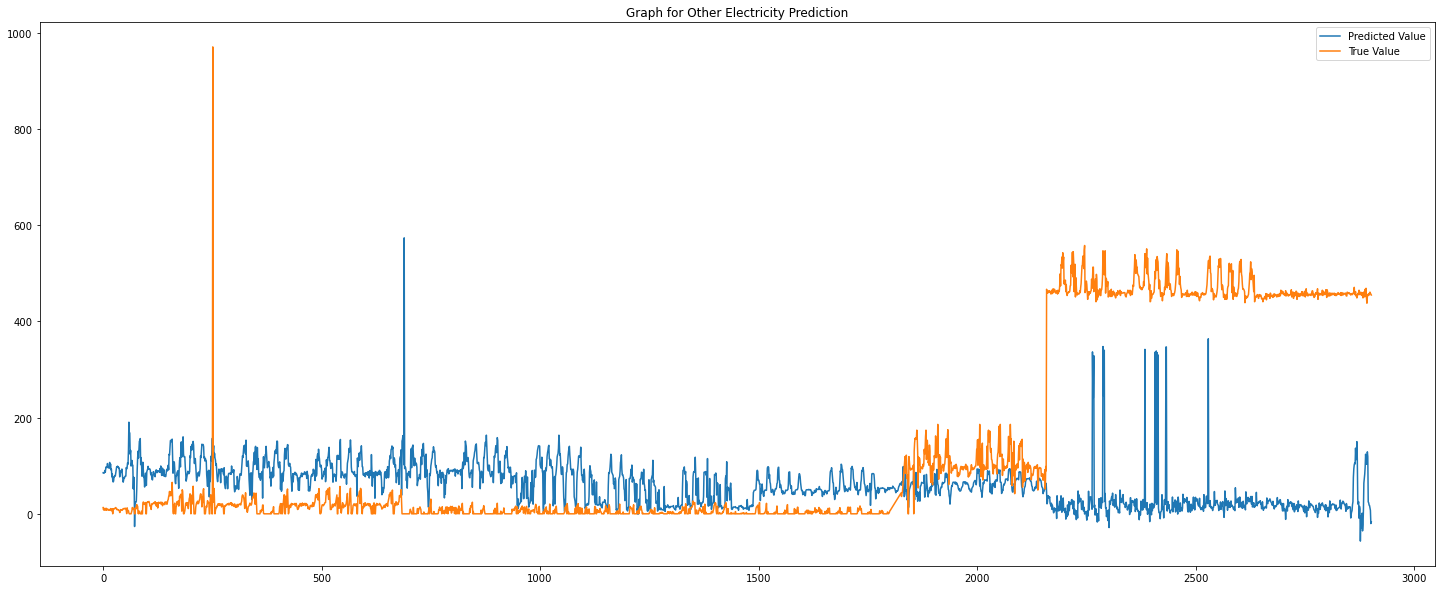

In [378]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [379]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  159.98830684610837

Root Mean Sqaured Error is:  234.39865697754547

R2 score is:  -0.40581469669365133


In [380]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

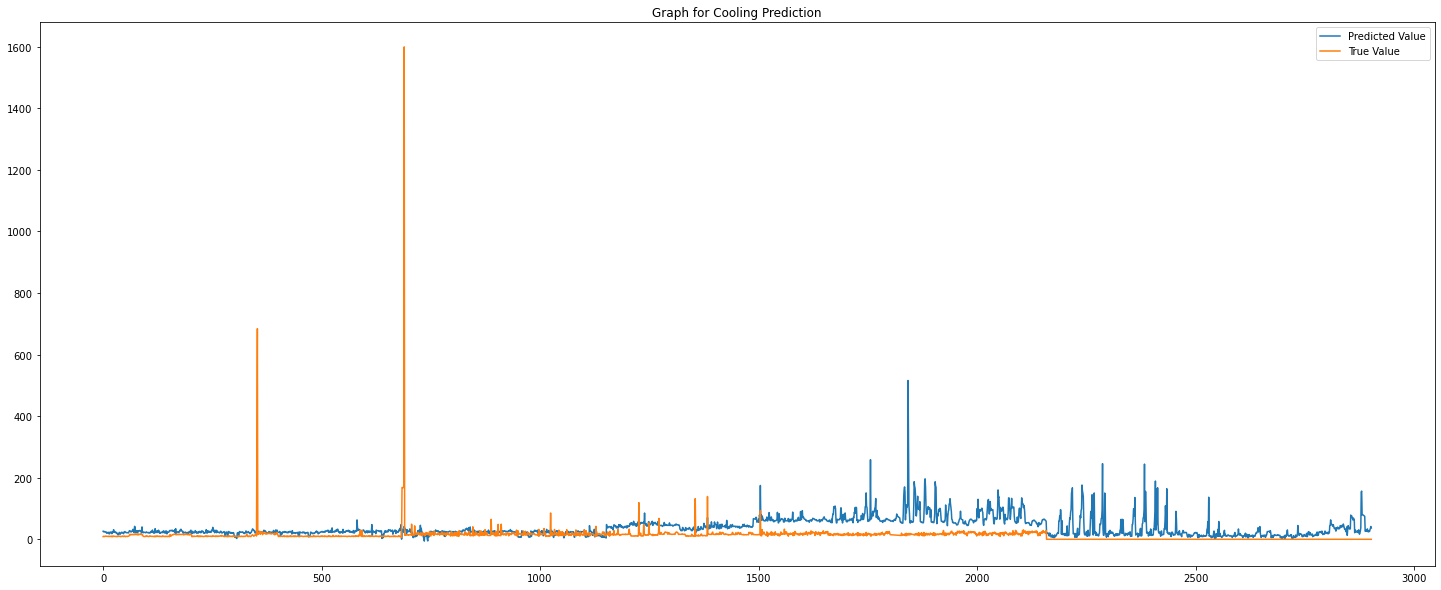

In [381]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [382]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  28.725829977783874

Root Mean Sqaured Error is:  51.17089741675398

R2 score is:  -1.205075637110459


In [383]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

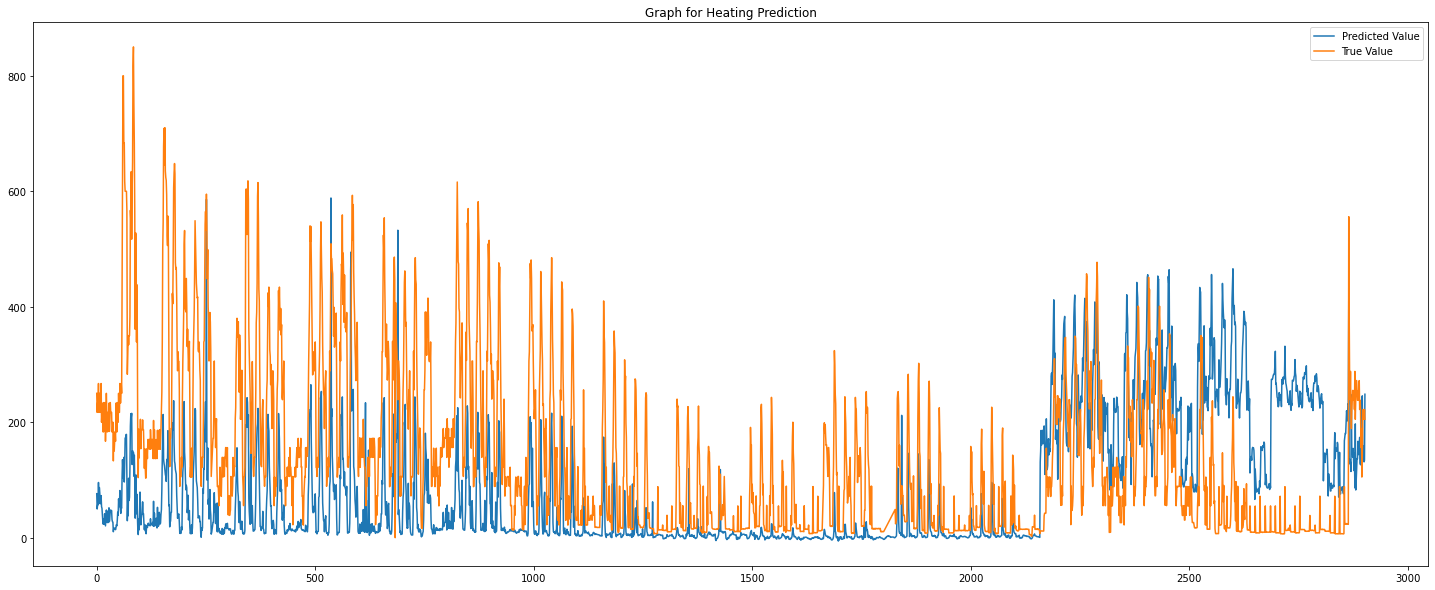

In [384]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [385]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  126.13901028720136

Root Mean Sqaured Error is:  164.06078023946037

R2 score is:  -0.2925266994768041


**Early Morning (1am to 8am)**

In [386]:
X_test1 = df4_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df4_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2088, 8) (2088, 6)


In [387]:
X_test1=sc.fit_transform(X_test1)

In [388]:
pred = model.predict(X_test1)

In [389]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

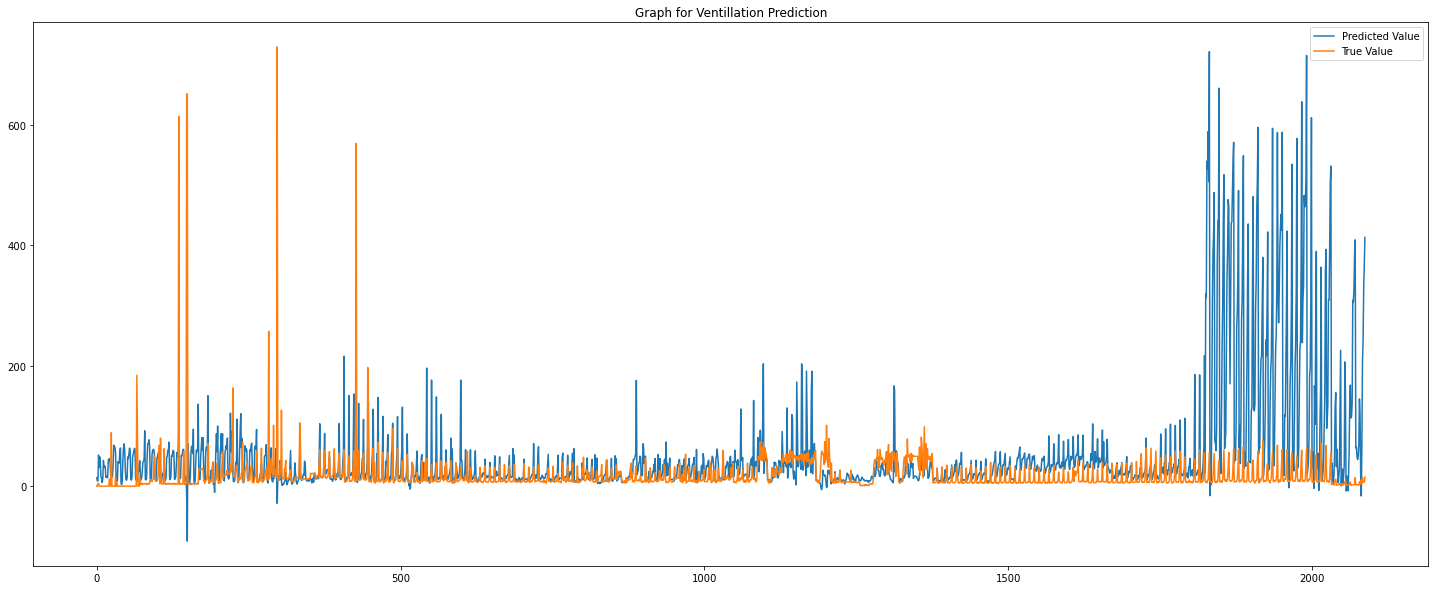

In [390]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [391]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  42.7765263368275

Root Mean Sqaured Error is:  100.69797689207915

R2 score is:  -6.851177695284831


In [392]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

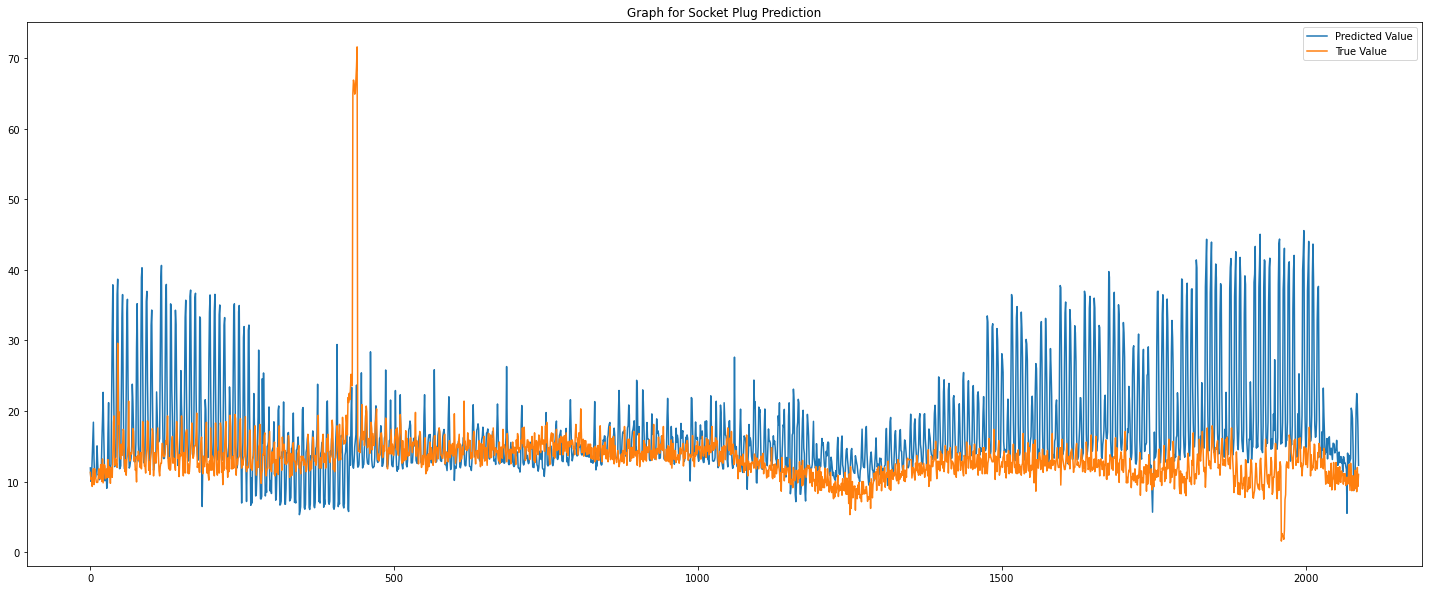

In [393]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [394]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.4844927789790425

Root Mean Sqaured Error is:  9.137867912940843

R2 score is:  -3.804267140636912


In [395]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

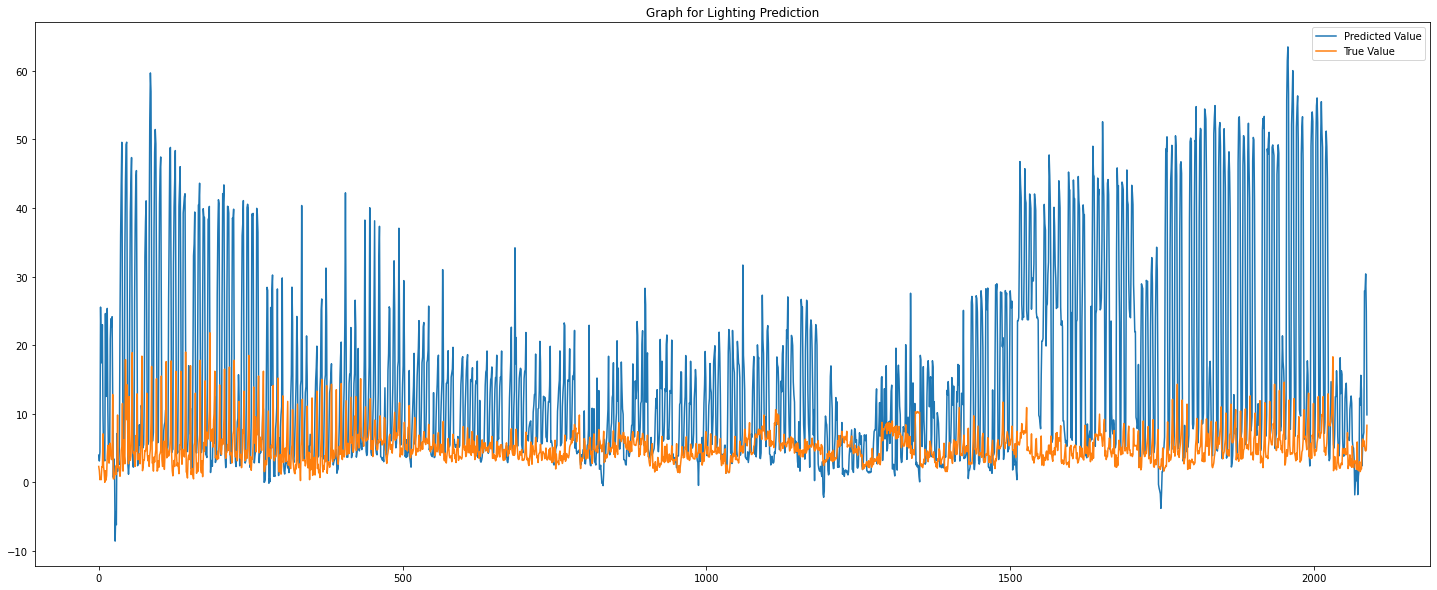

In [396]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [397]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  10.702754013988123

Root Mean Sqaured Error is:  16.68871591076636

R2 score is:  -40.085852344997726


In [398]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

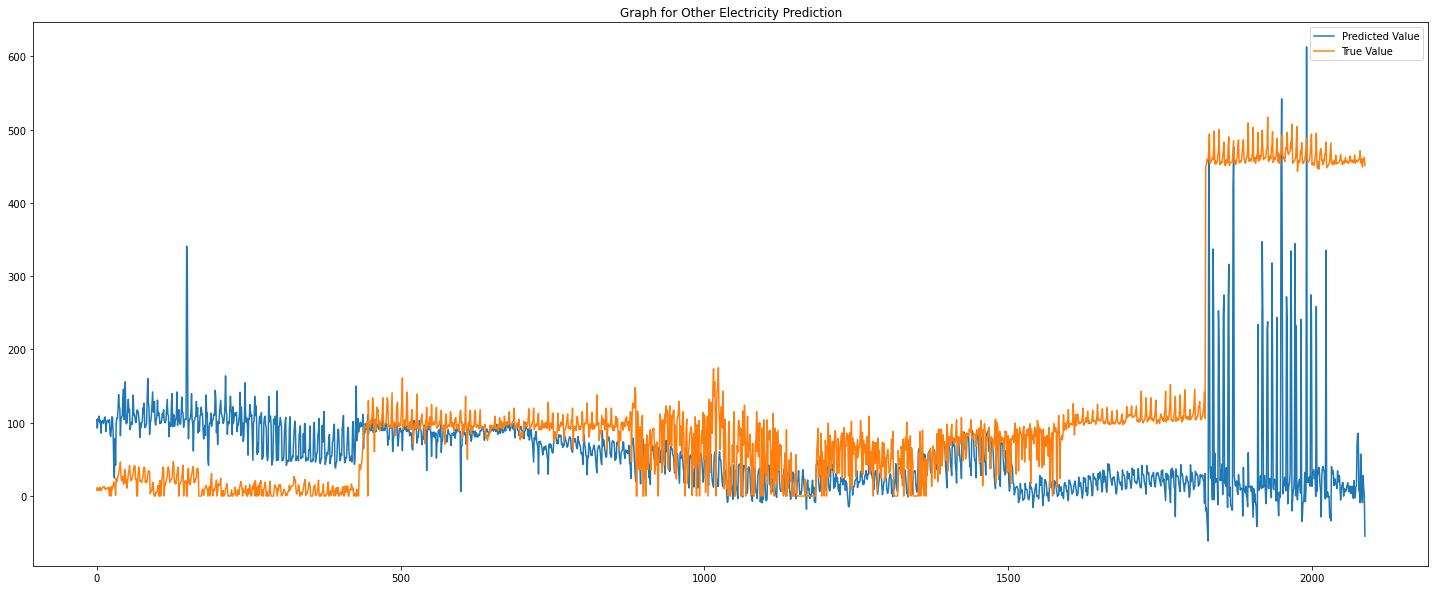

In [399]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [400]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  96.85177547015508

Root Mean Sqaured Error is:  162.00320481240396

R2 score is:  -0.37929046370832786


In [401]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

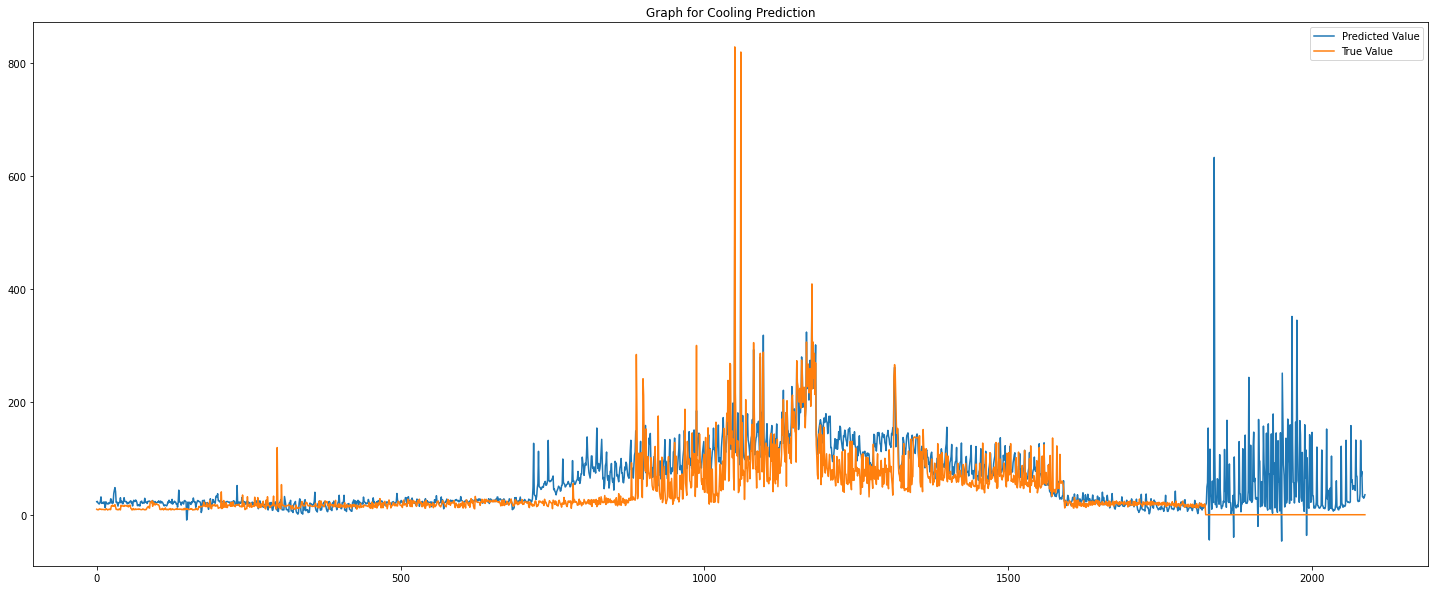

In [402]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [403]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  27.09446158865745

Root Mean Sqaured Error is:  45.25290087301316

R2 score is:  0.29372664113161495


In [404]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

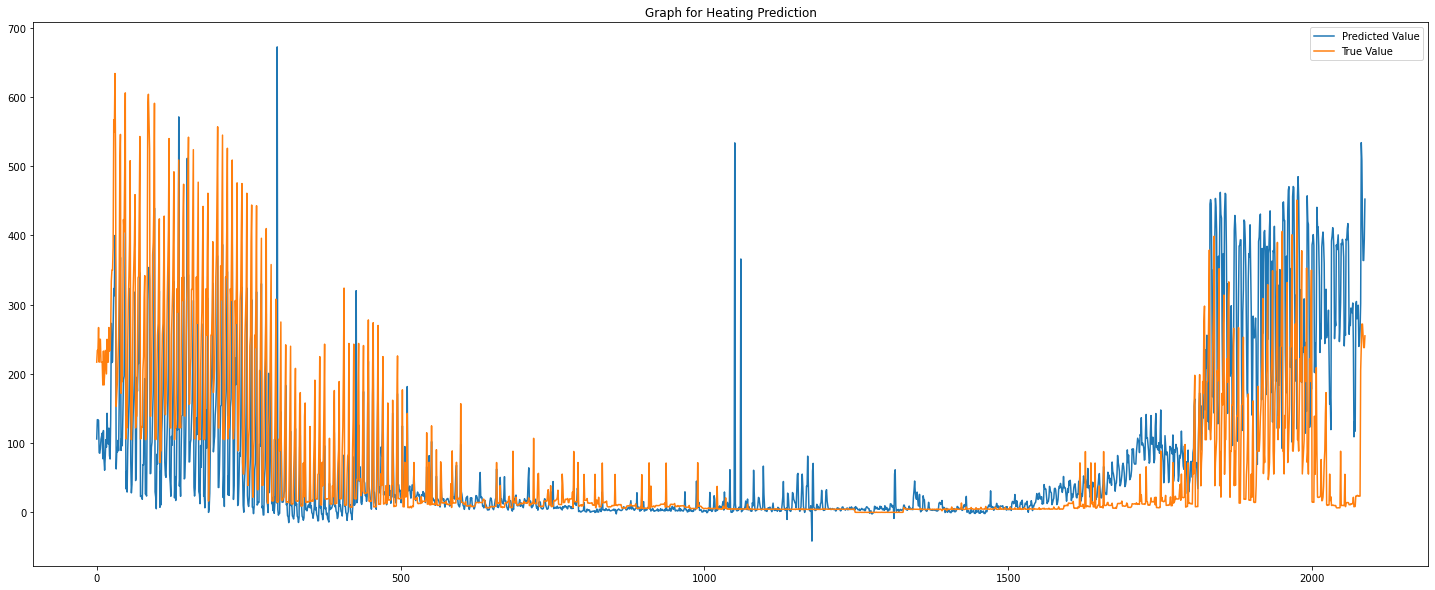

In [405]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [406]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  58.74139214619201

Root Mean Sqaured Error is:  108.06310814423809

R2 score is:  0.05376779959424005


**Working Hours (9am to 7pm)**

In [407]:
X_test1 = df5_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df5_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2871, 8) (2871, 6)


In [408]:
X_test1=sc.fit_transform(X_test1)

In [409]:
pred = model.predict(X_test1)

In [410]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

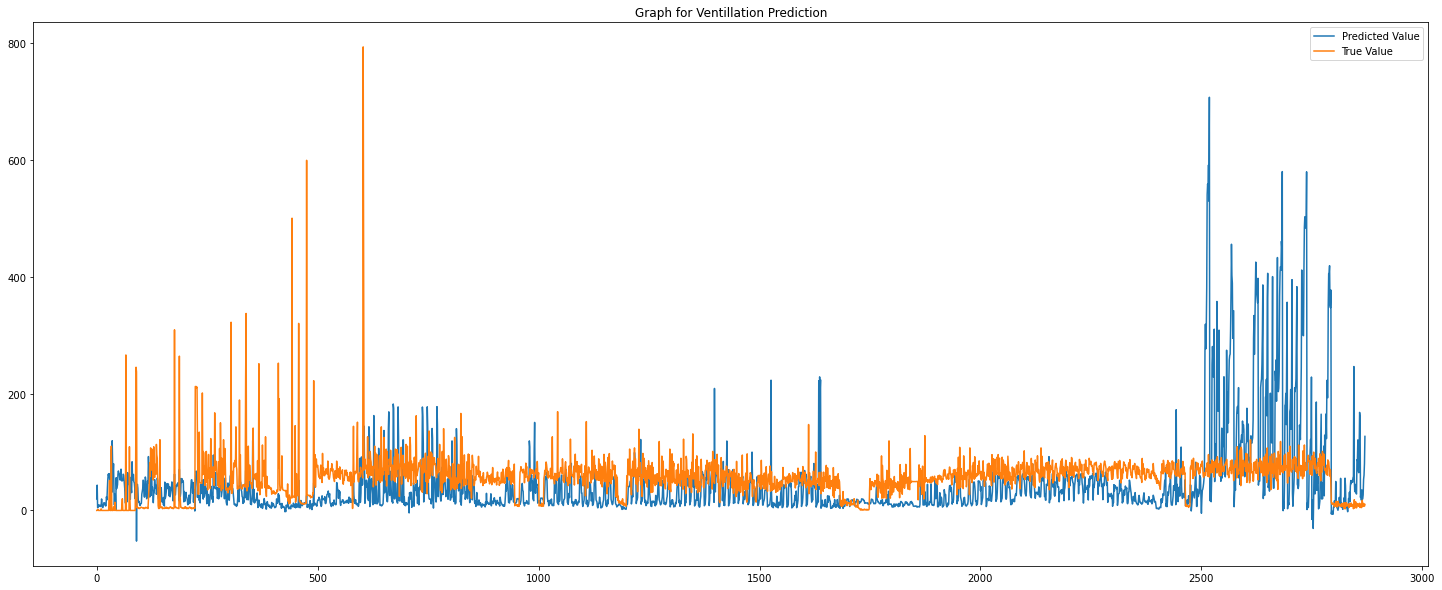

In [411]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [412]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  45.684623909278926

Root Mean Sqaured Error is:  74.53431703719613

R2 score is:  -3.0100620569907557


In [413]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

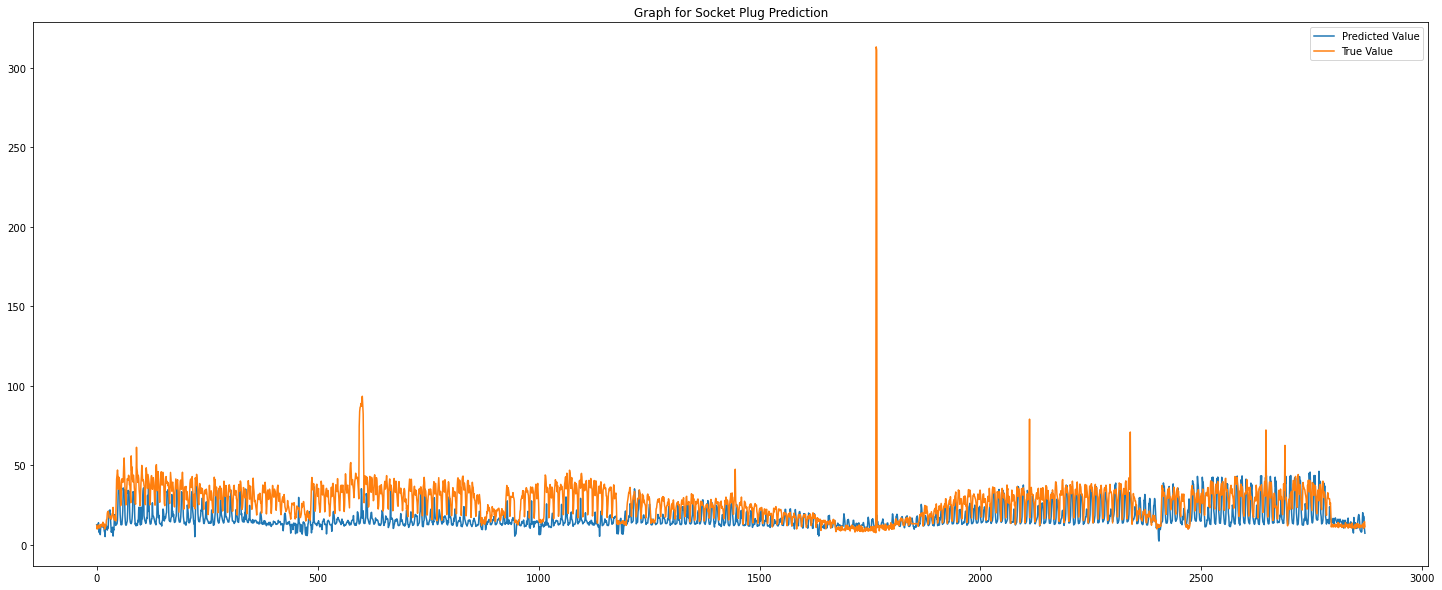

In [414]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [415]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  10.795085149314586

Root Mean Sqaured Error is:  15.780444803458188

R2 score is:  -0.5714576781860099


In [416]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

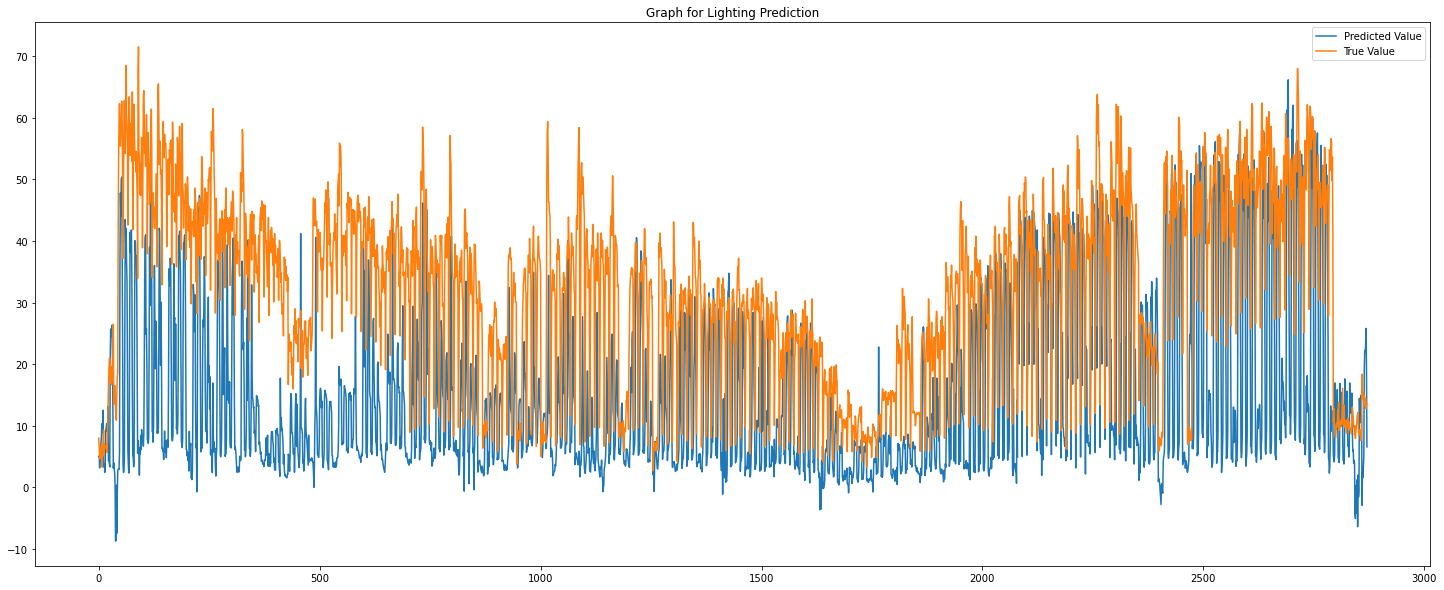

In [417]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [418]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  18.858635032302317

Root Mean Sqaured Error is:  23.035189540357194

R2 score is:  -1.4687172360733944


In [419]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

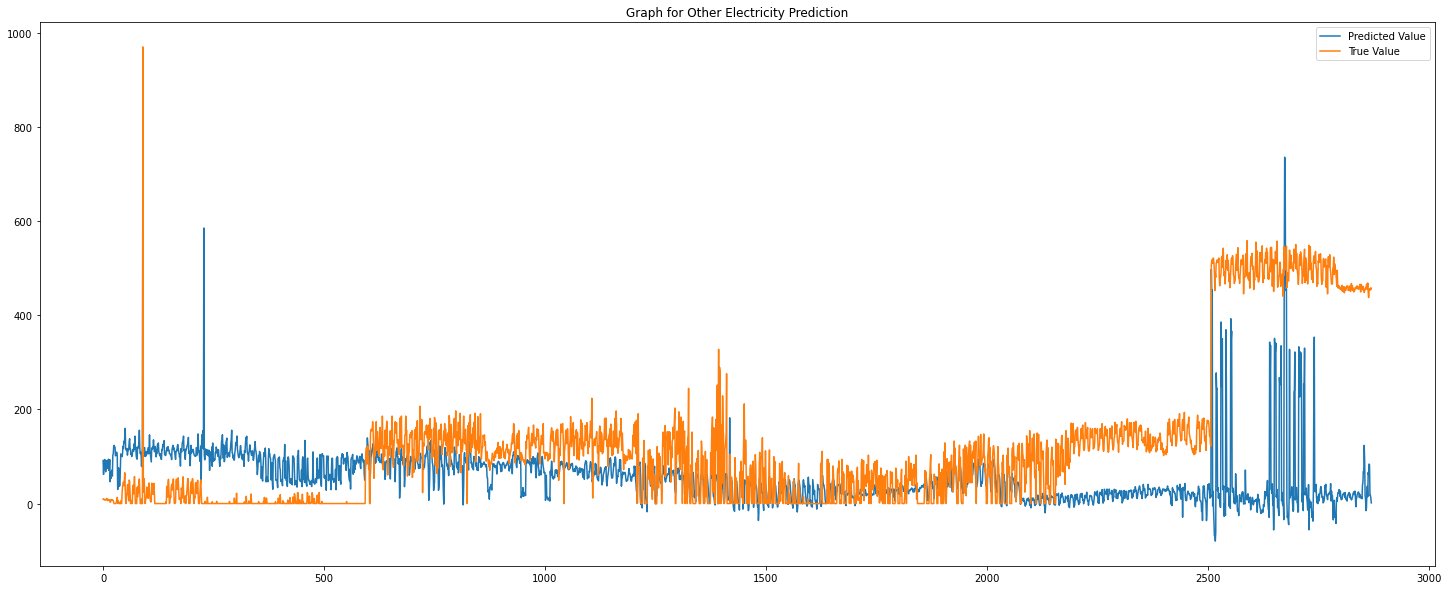

In [420]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [421]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  112.32366713697837

Root Mean Sqaured Error is:  176.82313777242172

R2 score is:  -0.33946109124696067


In [422]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

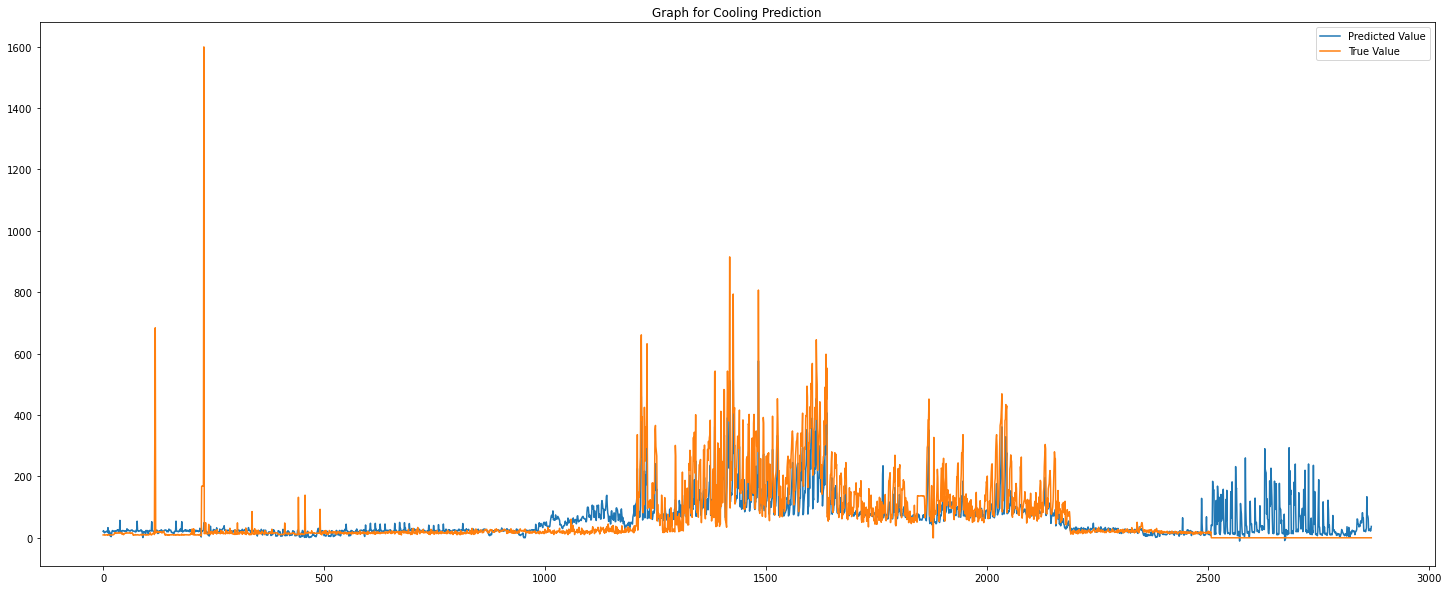

In [423]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [424]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  35.89579200339728

Root Mean Sqaured Error is:  65.4817053647976

R2 score is:  0.6078540559941901


In [425]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

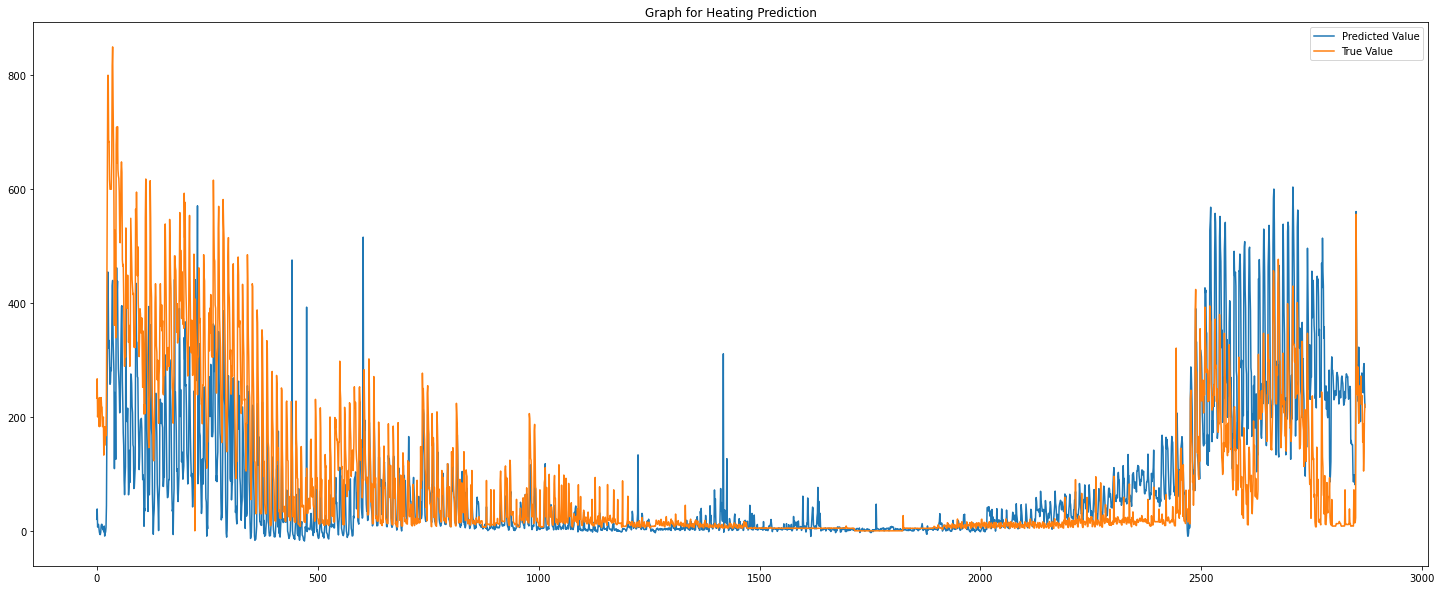

In [426]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [427]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  63.16997619453936

Root Mean Sqaured Error is:  105.01097135935349

R2 score is:  0.42117075234977397


**Night (8pm to 12am)**

In [428]:
X_test1 = df6_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df6_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(1305, 8) (1305, 6)


In [429]:
X_test1=sc.fit_transform(X_test1)

In [430]:
pred = model.predict(X_test1)

In [431]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

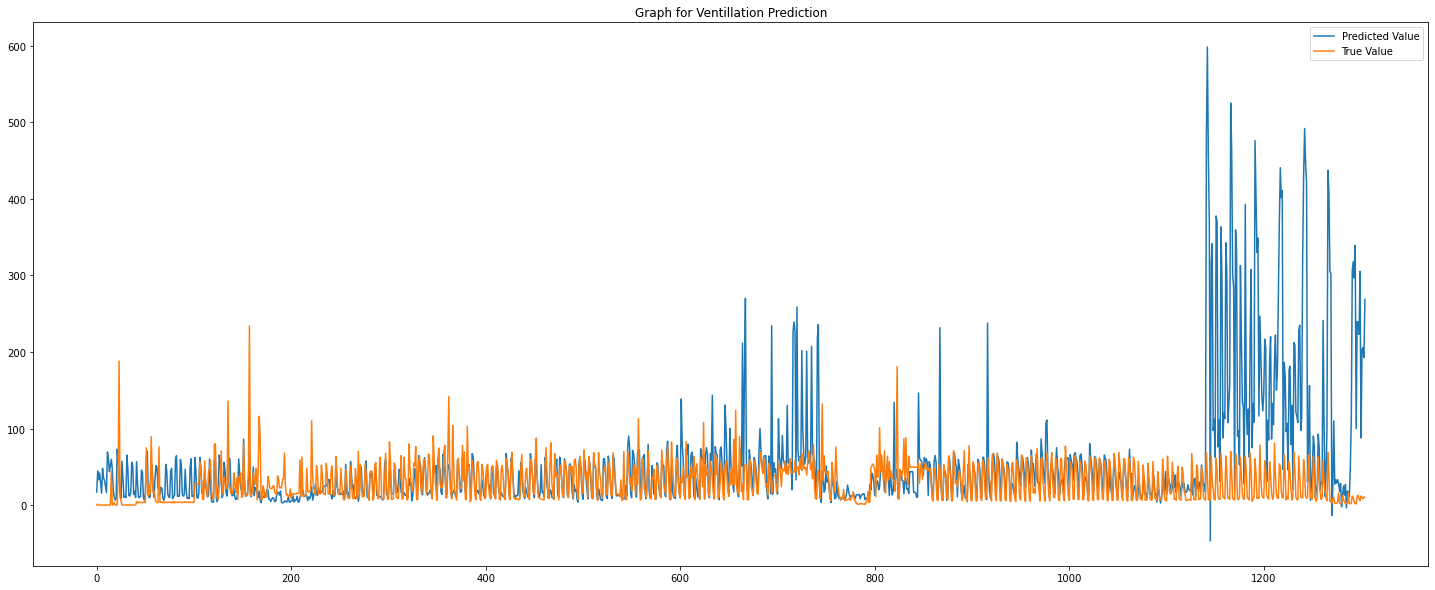

In [432]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [433]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  35.22351454038364

Root Mean Sqaured Error is:  77.2390065549964

R2 score is:  -8.532480258591821


In [434]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

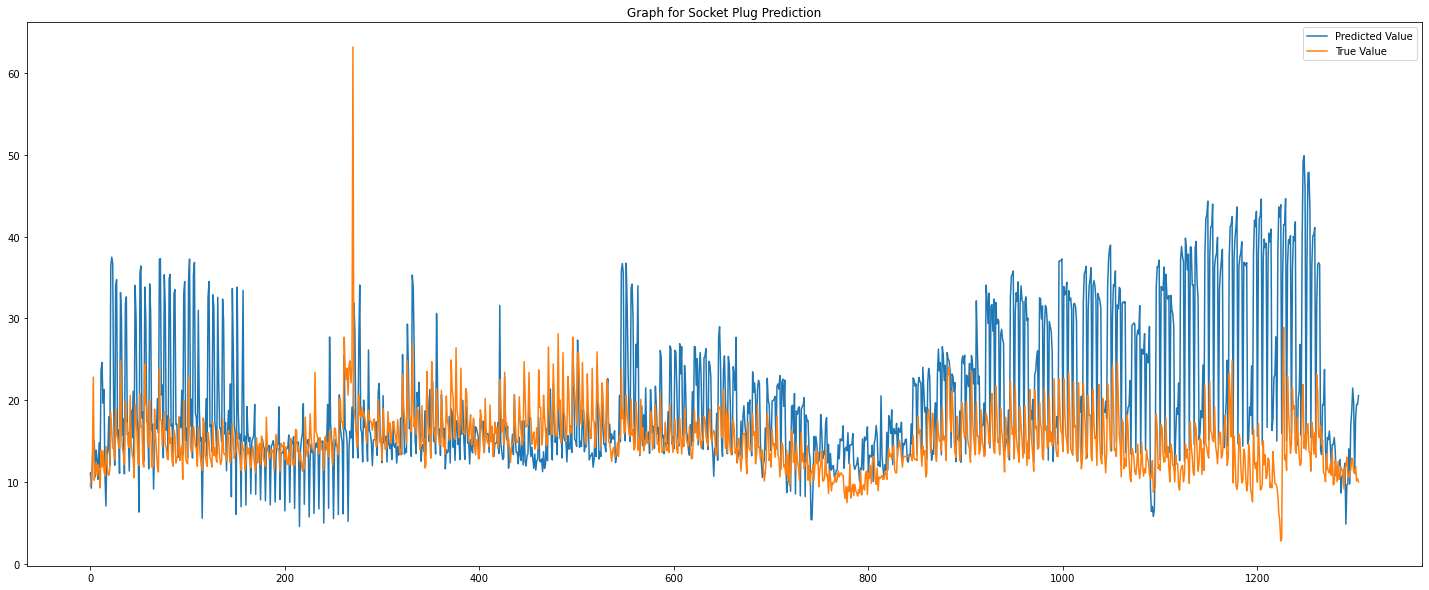

In [435]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [436]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  6.805198279457532

Root Mean Sqaured Error is:  10.12636702548256

R2 score is:  -6.237565566878125


In [437]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

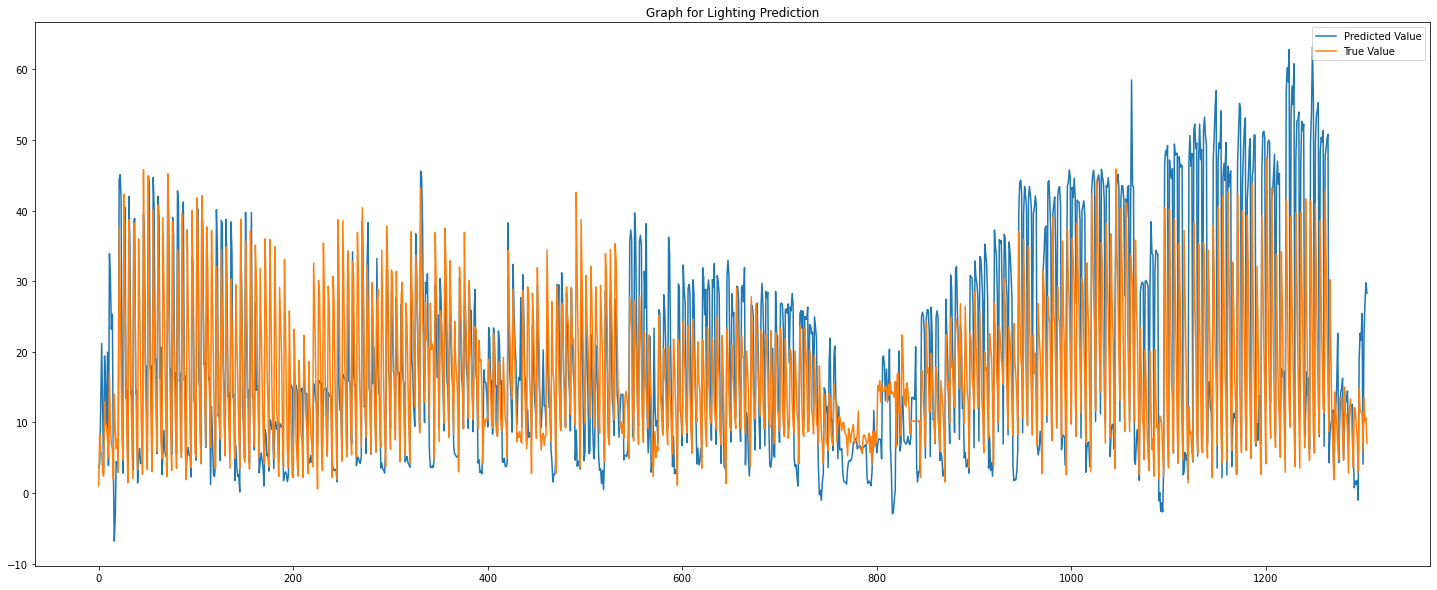

In [438]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [439]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  9.193877485651944

Root Mean Sqaured Error is:  12.95308197018682

R2 score is:  -0.6705529142051136


In [440]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

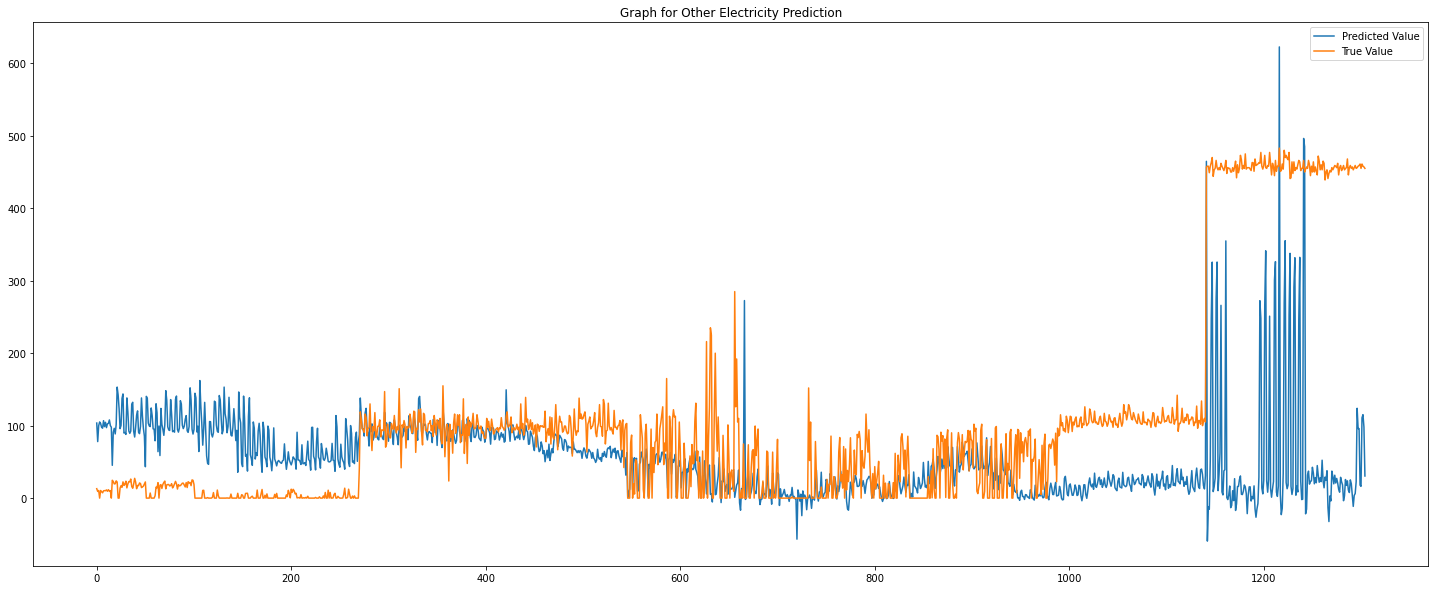

In [441]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [442]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  91.70320215261978

Root Mean Sqaured Error is:  156.41427135433068

R2 score is:  -0.23412099252474117


In [443]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

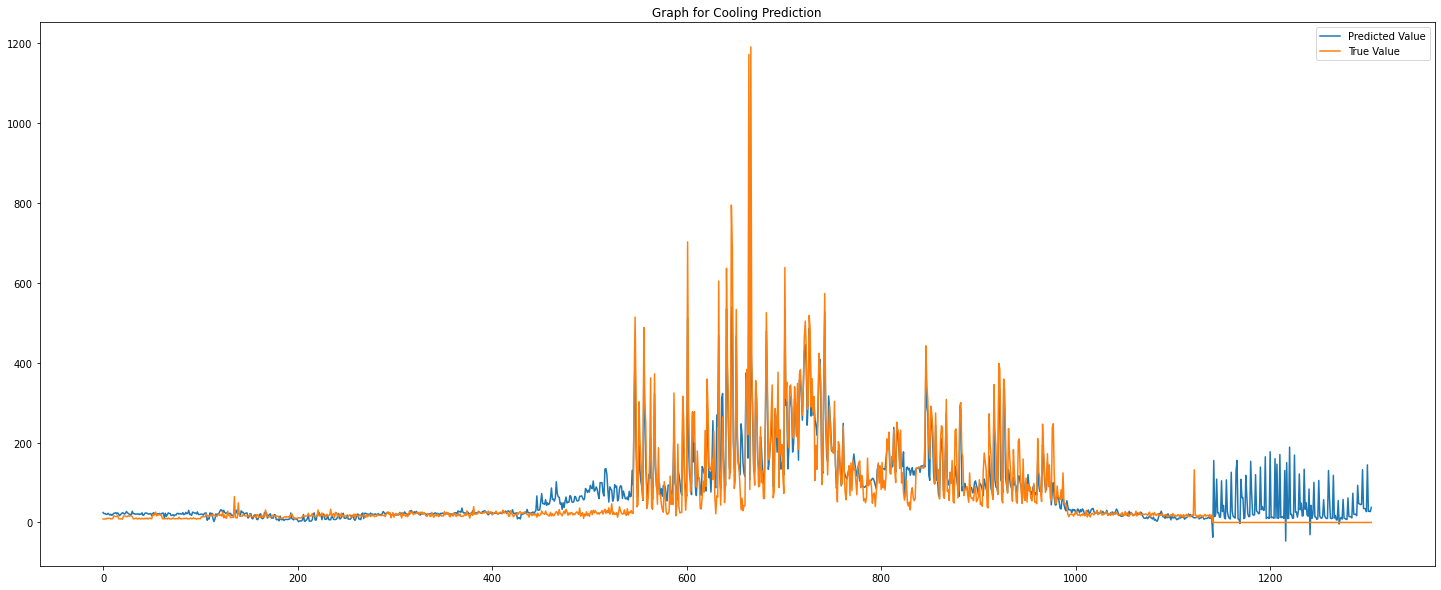

In [444]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [445]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  26.530167155444847

Root Mean Sqaured Error is:  49.244304797092795

R2 score is:  0.8012909413237194


In [446]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

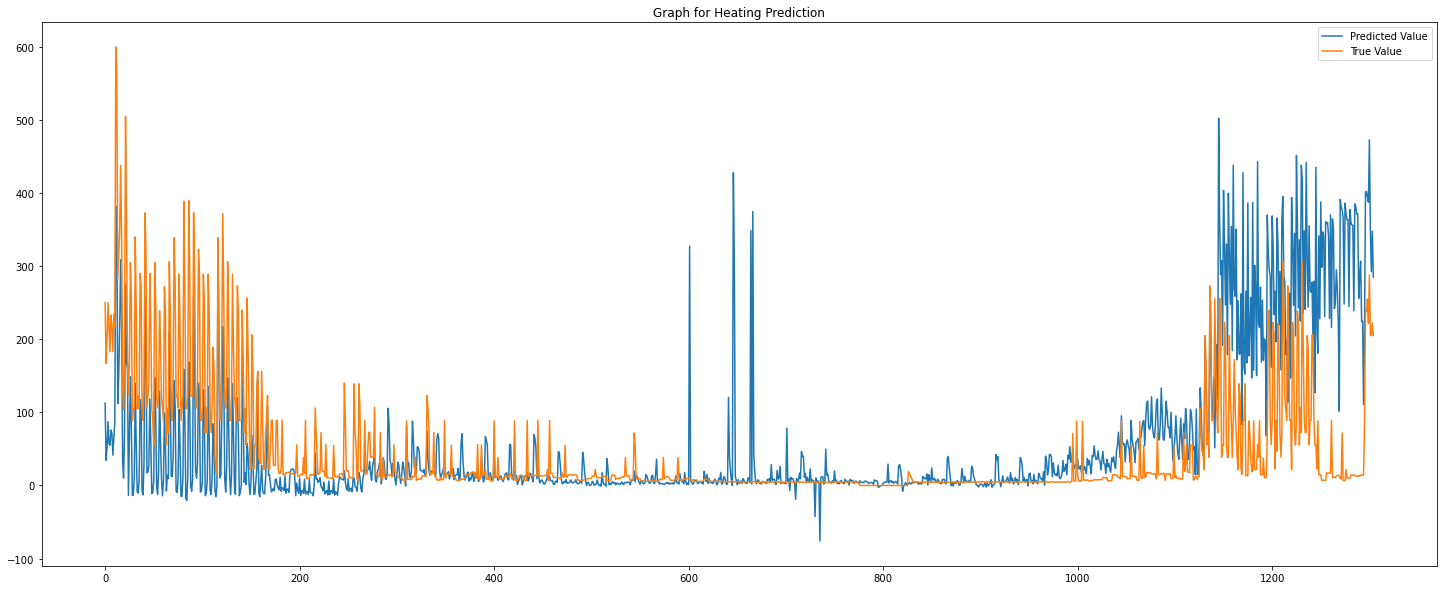

In [447]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [448]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  54.18753438933063

Root Mean Sqaured Error is:  99.06654728579312

R2 score is:  -0.6539407992274655


**Weekends (Saturday and Sunday)**

In [449]:
X_test1 = df7_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df7_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2496, 8) (2496, 6)


In [450]:
X_test1=sc.fit_transform(X_test1)

In [451]:
pred = model.predict(X_test1)

In [452]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

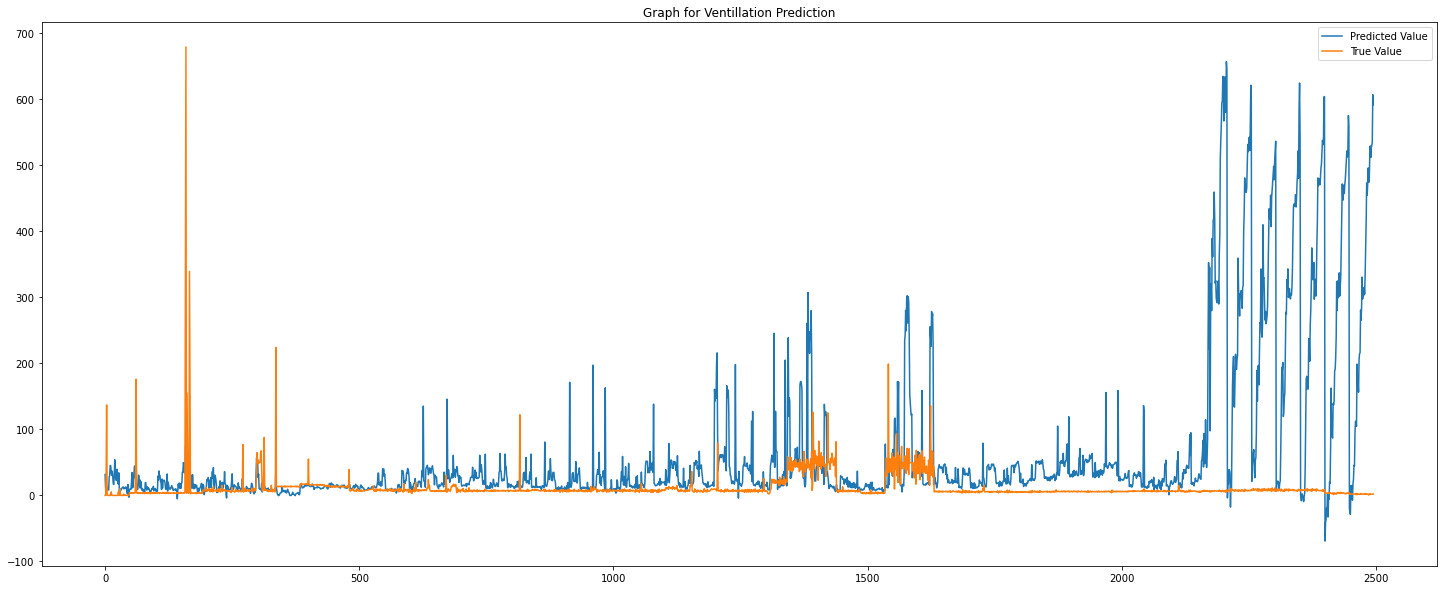

In [453]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [454]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  57.45065662690806

Root Mean Sqaured Error is:  129.43158667528112

R2 score is:  -32.136336499415236


In [455]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

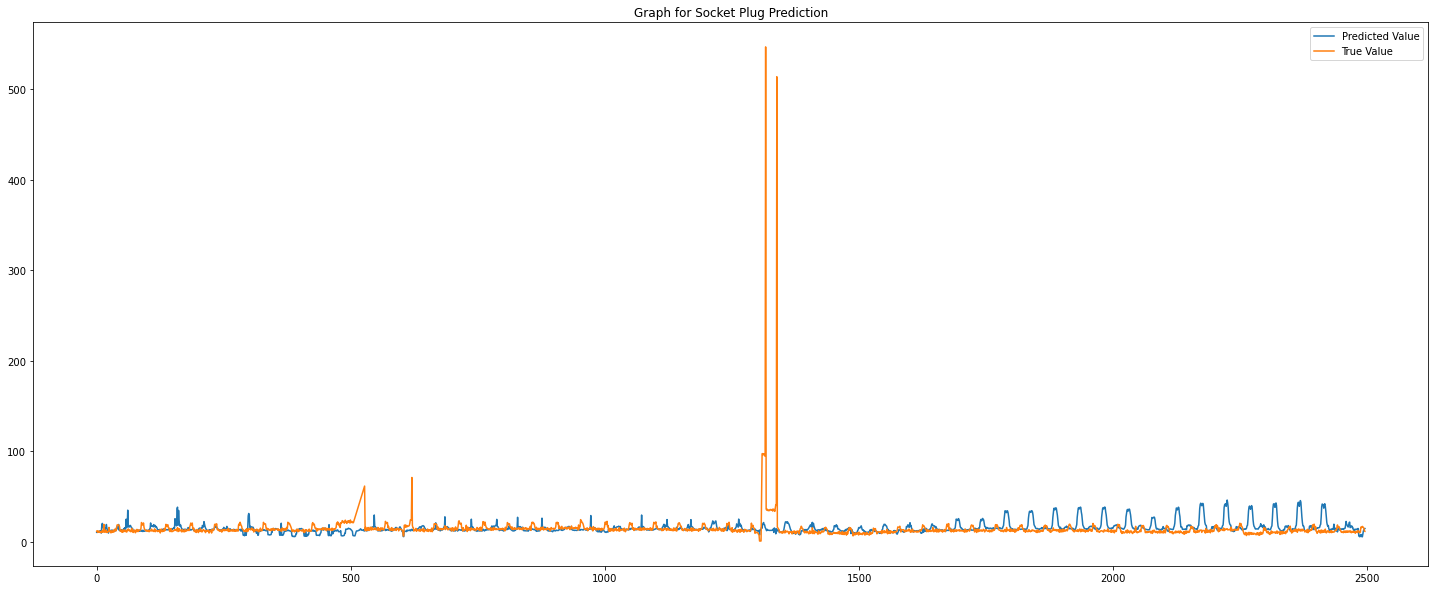

In [456]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [457]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.429833969797843

Root Mean Sqaured Error is:  17.2222778359313

R2 score is:  -0.15954578059402724


In [458]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

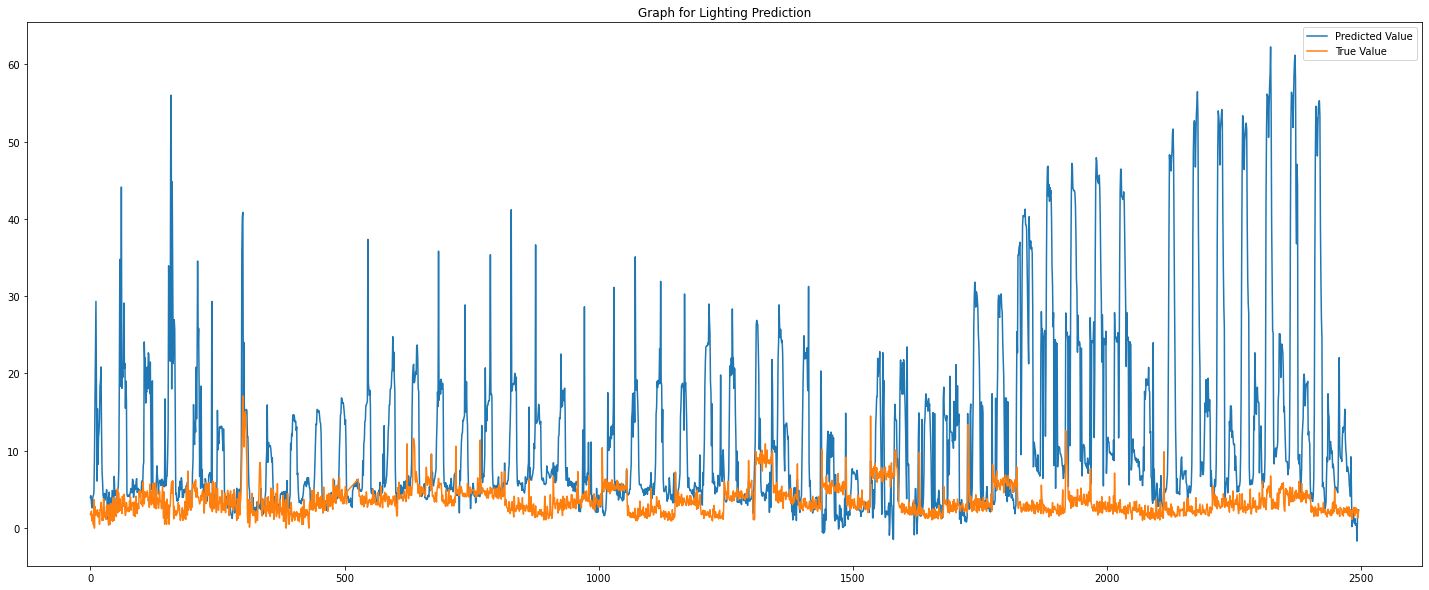

In [459]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [460]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  8.806671572505474

Root Mean Sqaured Error is:  14.27856760754401

R2 score is:  -58.82200180994432


In [461]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

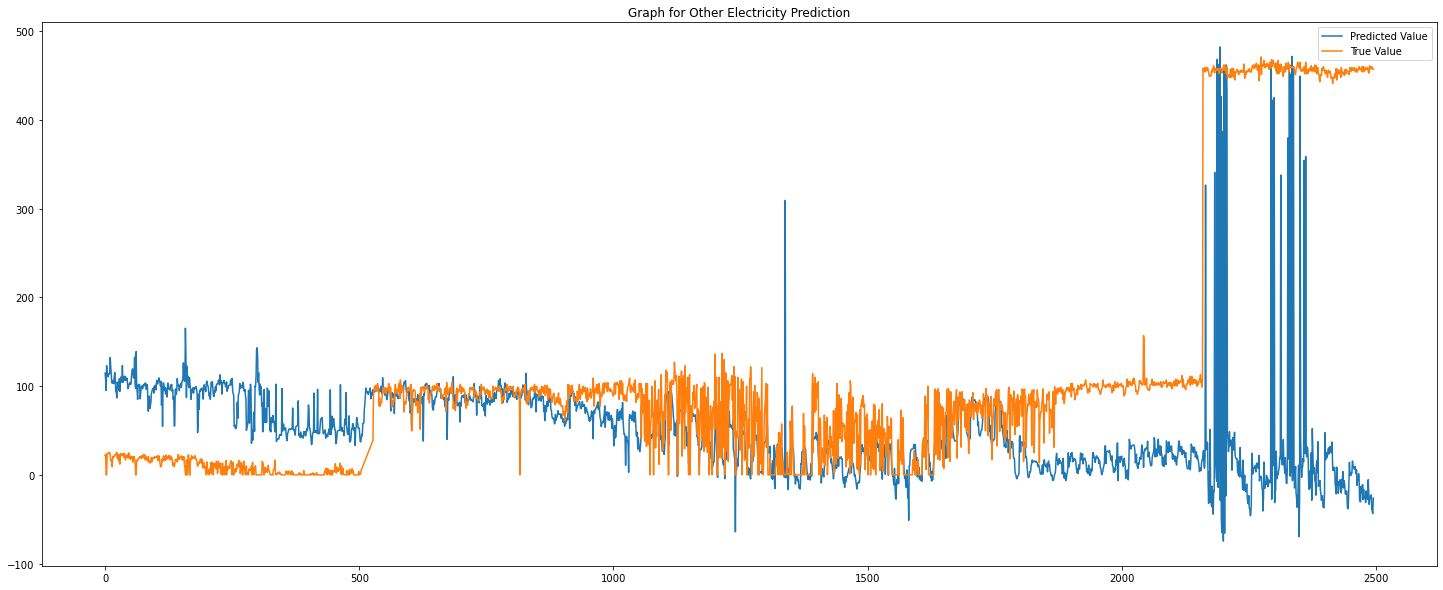

In [462]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [463]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  96.08286498777659

Root Mean Sqaured Error is:  170.3379108581785

R2 score is:  -0.4648260091981673


In [464]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

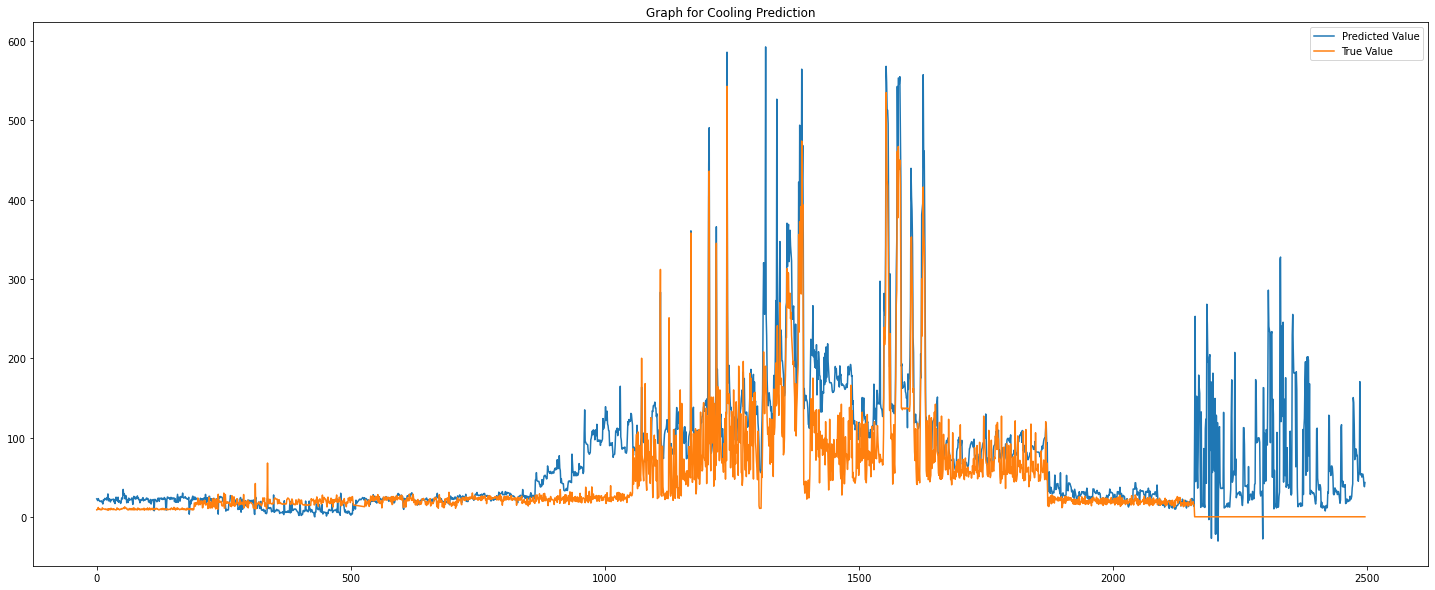

In [465]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [466]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  33.44203612252198

Root Mean Sqaured Error is:  53.487077653493465

R2 score is:  0.24398218903688162


In [467]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

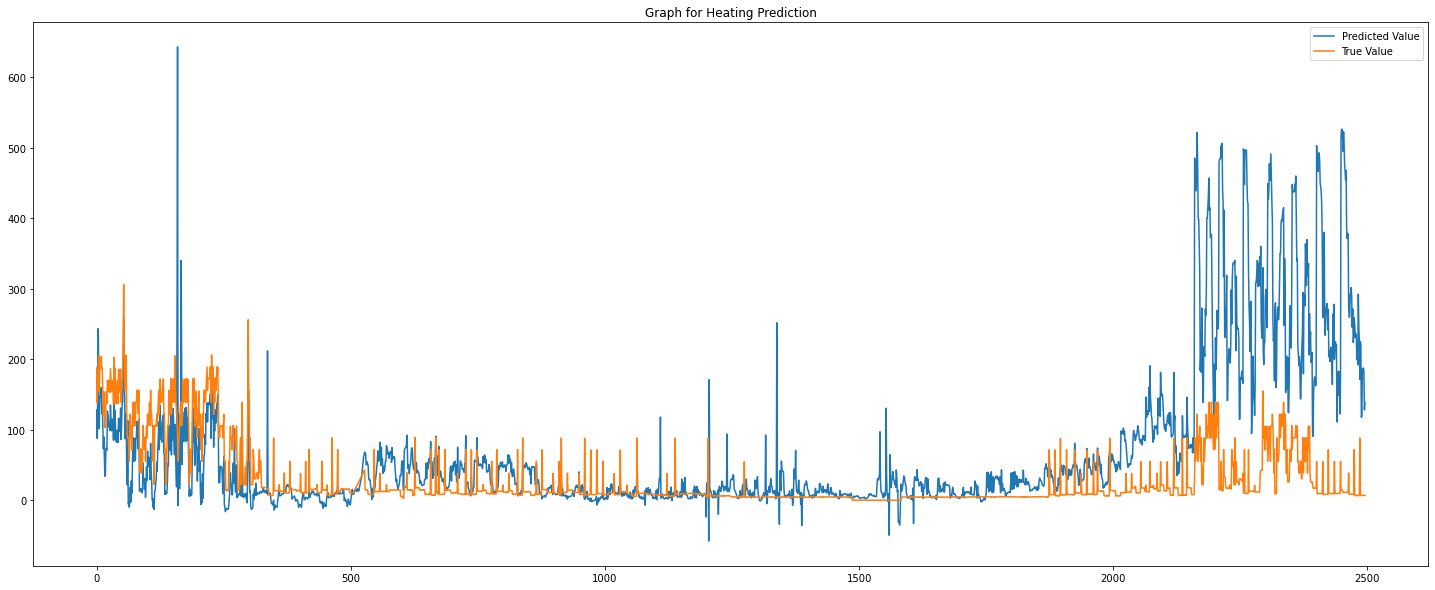

In [468]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [469]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  56.46114938955184

Root Mean Sqaured Error is:  106.46157043060266

R2 score is:  -4.907504897121864
